In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

In [3]:
from IPython.display import clear_output
from src.dataset_loaders import get_samplers, get_indices
from src.utils import get_pca_models
from src import utils
from src.train import train_continuous
import wandb
from torch.utils.data import TensorDataset, DataLoader
import yaml
import numpy as np


## 1. Parameters.

Possible ```DATASET_NAME``` values are: ```twitter```, ```wiki-gigaword```, ```bone_marrow```

In [4]:

DATASET_NAME = 'twitter'
METHOD_NAME  = 'NeuralGW'
DEVICE       = 'cuda:1'
SOURCE_DIM   = 100  #38 (bone_marrow)
TARGET_DIM   = 50 #50 (bone_marrow)
ALPHA        = 0.5
SEED         = 43
TEST_SPLIT   = 0.9

config = {'dataset':dict(DATASET_NAME     = DATASET_NAME,
                         DEVICE           = DEVICE,
                         SOURCE_DIM       = SOURCE_DIM,
                         TARGET_DIM       = TARGET_DIM,
                         MAX_WORDS        = 400000, #set to 6667 to get N_train=3K
                         TEST_SPLIT       = TEST_SPLIT,
                         ALPHA            = ALPHA, 
                         BATCH_SIZE_TRAIN = 256,
                         BATCH_SIZE_TEST  = 256,
                         SEED             = SEED,
                         TRAIN_TYPE       = 'continuous',
                          ),
          
          'training':dict(METHOD_NAME     = METHOD_NAME,
                          N_EPOCHS        = 70,
                          N_EVAL          = 2,
                          COST_ITERS      = 1,
                          MOVER_ITERS     = 10,
                          CRITIC_ITERS    = 1,
                          REG_CRITIC      = 0.1,
                          COST_LR         = 1e-4,
                          MOVER_LR        = 1e-4, 
                          CRITIC_LR       = 1e-4,
                          HIDDEN_SIZE_MLP = 512,
                          N_LAYERS_MLP    = 4,
                          N_SAMPLES_PLOT  = 256
                          )}



## 2. Loading dataset.

In [5]:
dataset_path = '../datasets'
sys.path.append(dataset_path)

source_vectors, target_vectors, random_indices_train, random_indices_test = get_indices(dataset_path, config)

print(source_vectors.shape)
print(target_vectors.shape)

Loading model twitter_100 to source...
Loading model twitter_50 to target...
torch.Size([400000, 100])
torch.Size([400000, 50])


## 3. Training.

Loading model twitter_100 to source...
Loading model twitter_50 to target...
Experiment for ALPHA=0.0
Source pairs...
tensor([     0,      1,      2,  ..., 179997, 179998, 179999])
180000
Target pairs...
tensor([180000, 180001, 180002,  ..., 359997, 359998, 359999])
180000


wandb: Currently logged in as: entropic_gw (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.17.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Epoch:   0%|          | 0/70 [00:00<?, ?it/s]

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

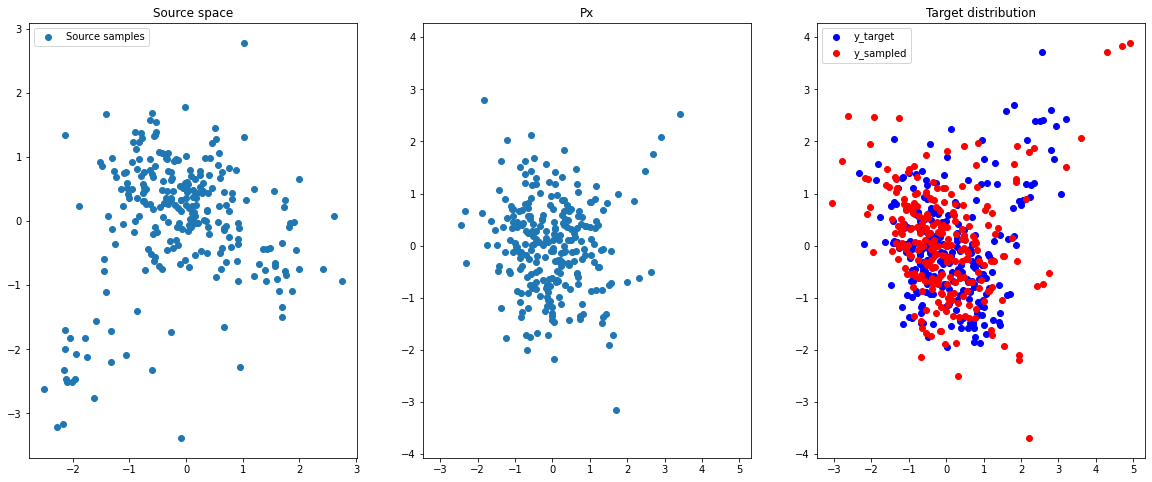

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

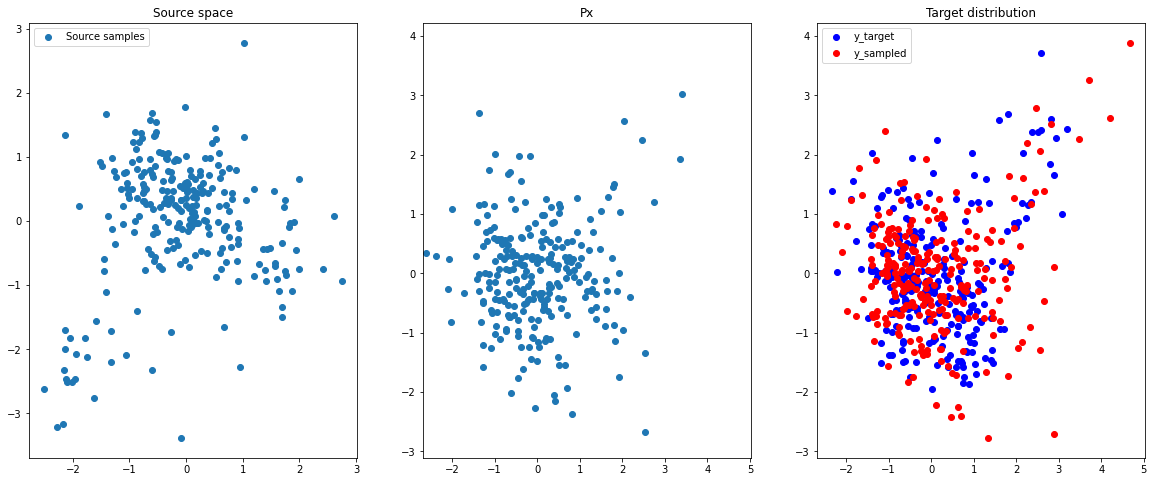

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

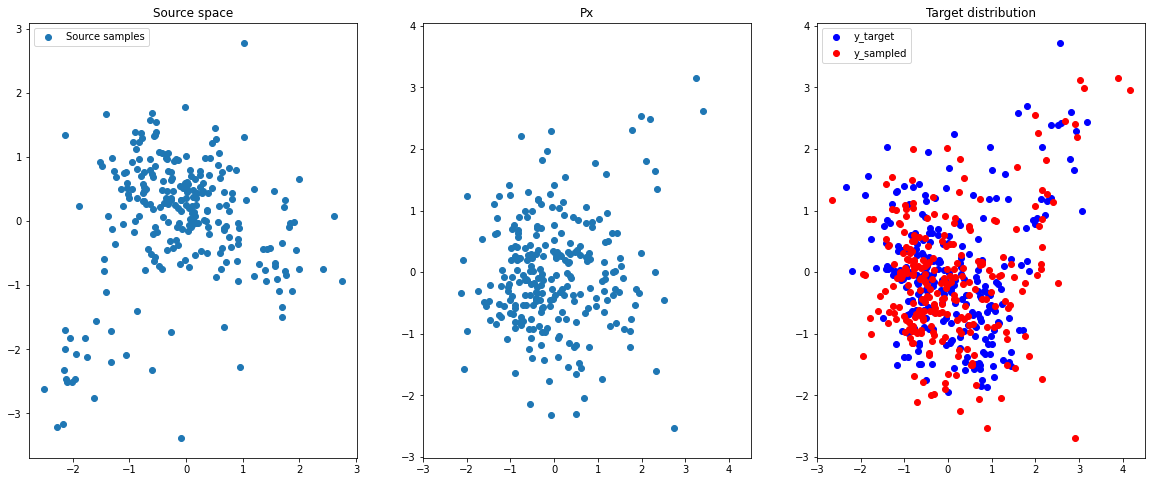

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

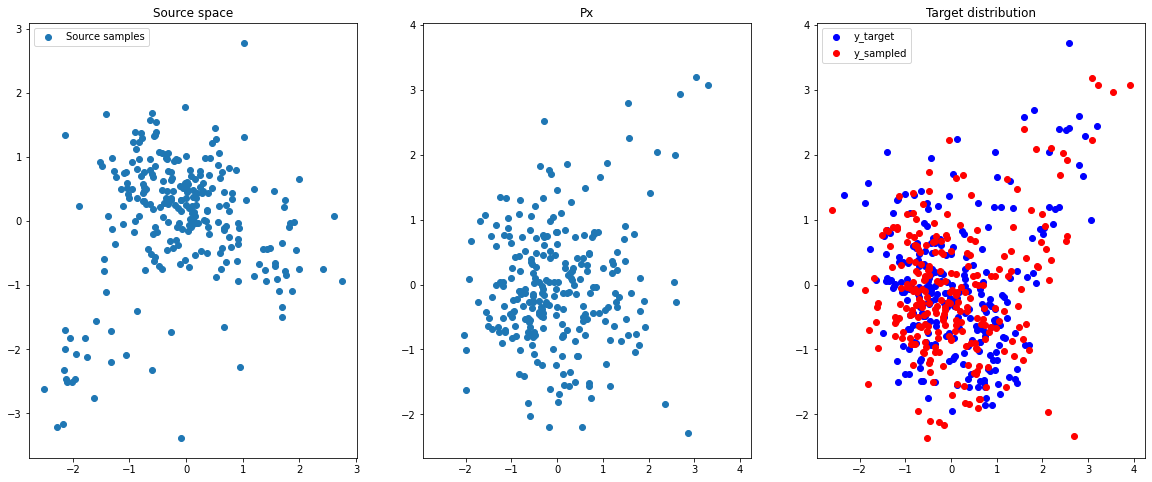

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

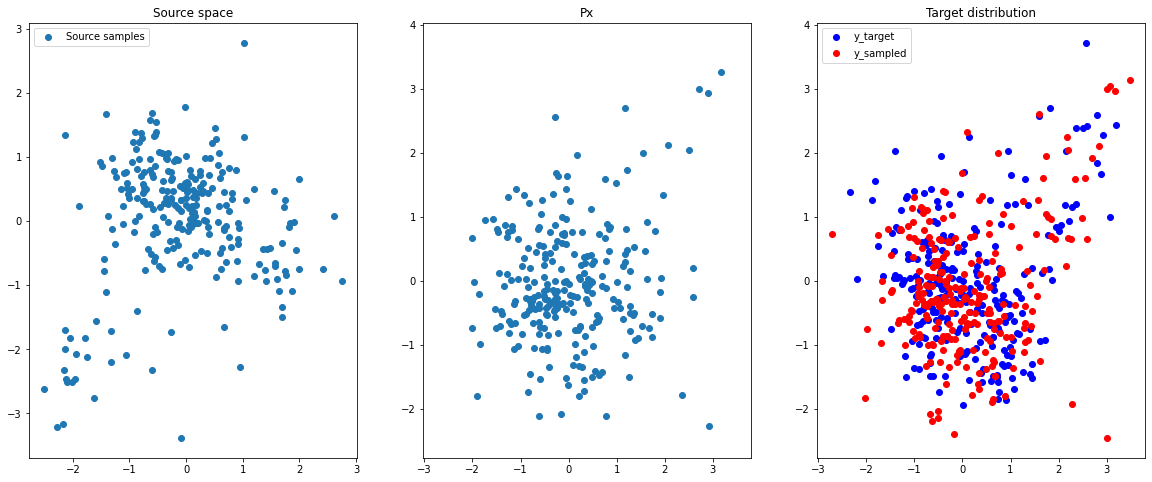

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

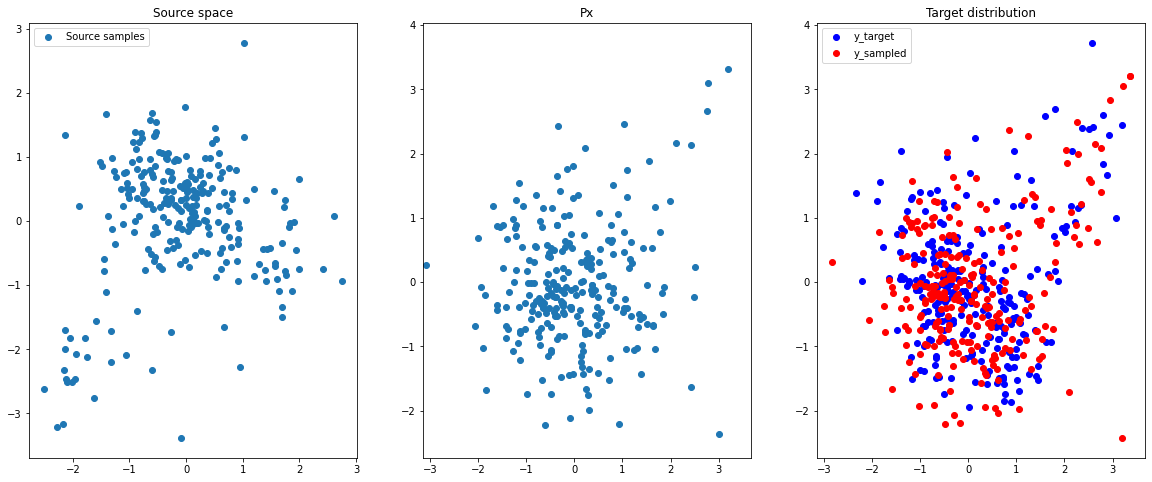

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

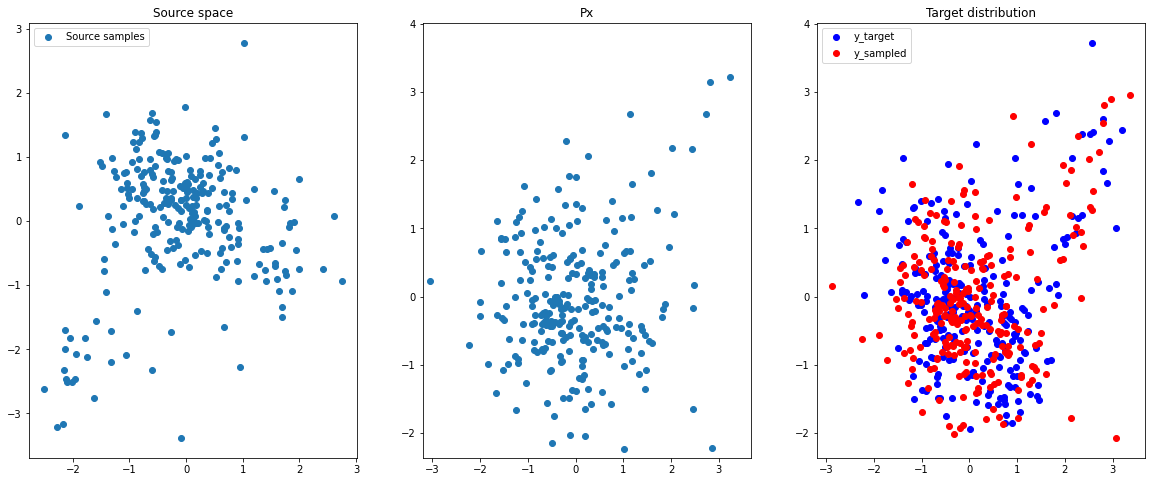

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

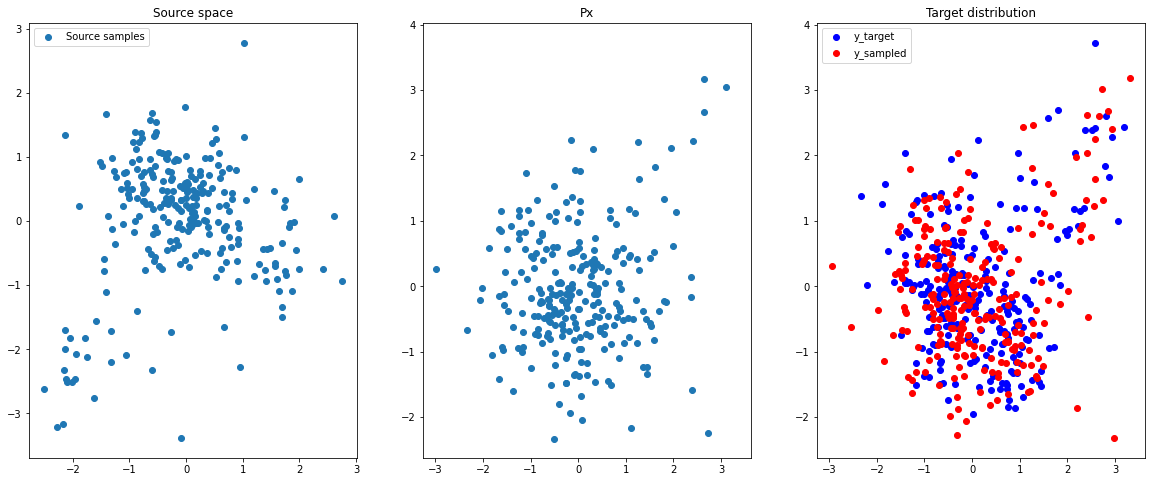

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

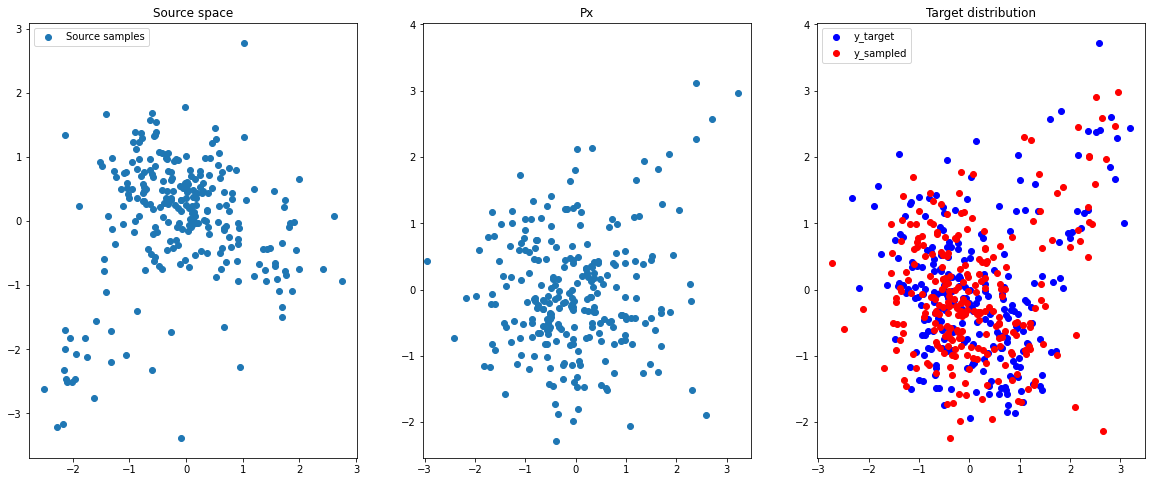

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

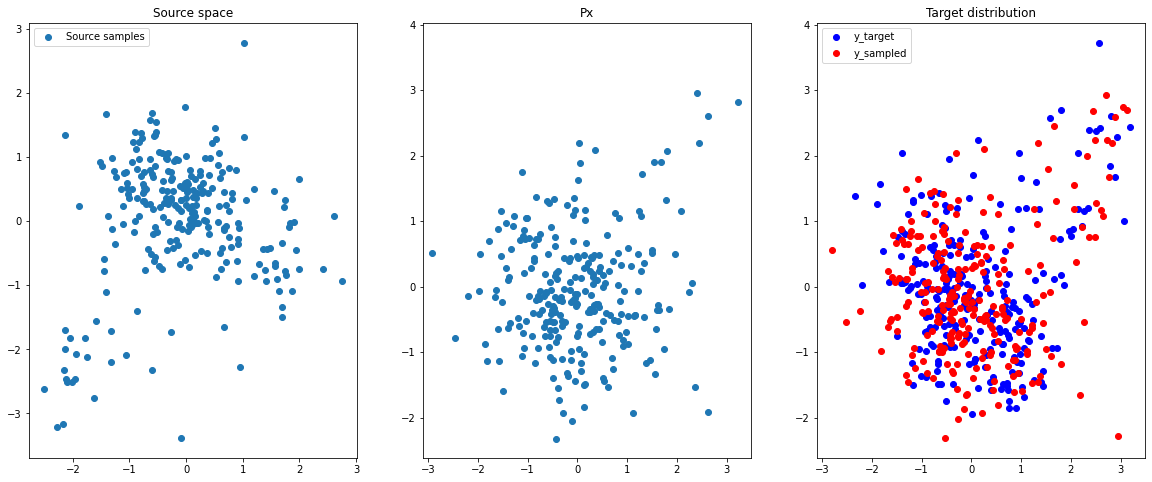

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

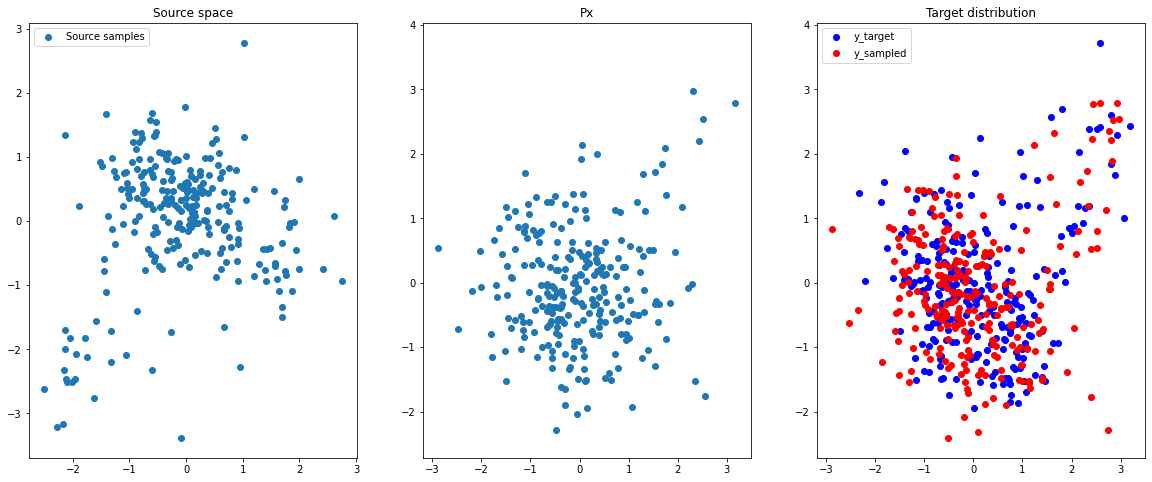

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

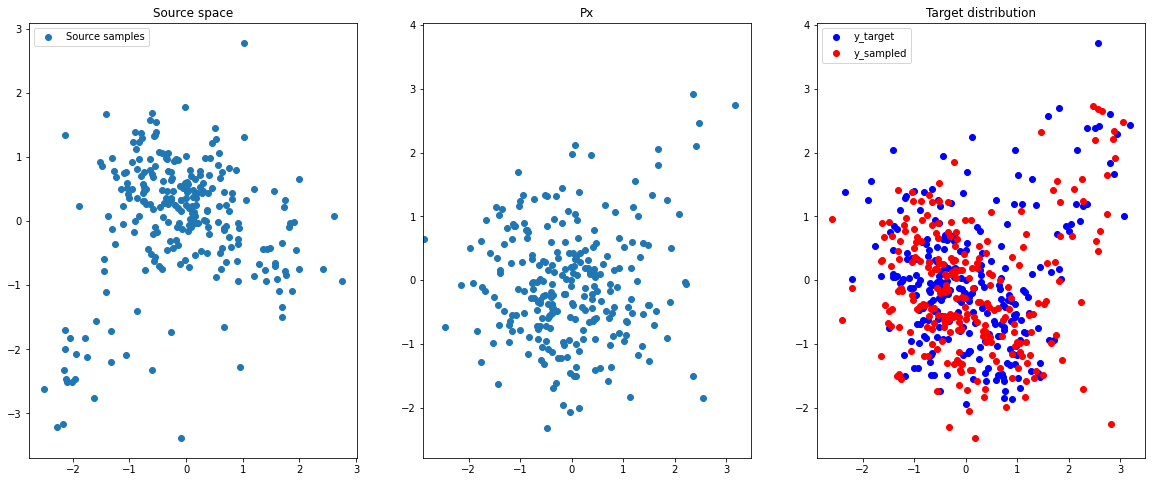

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

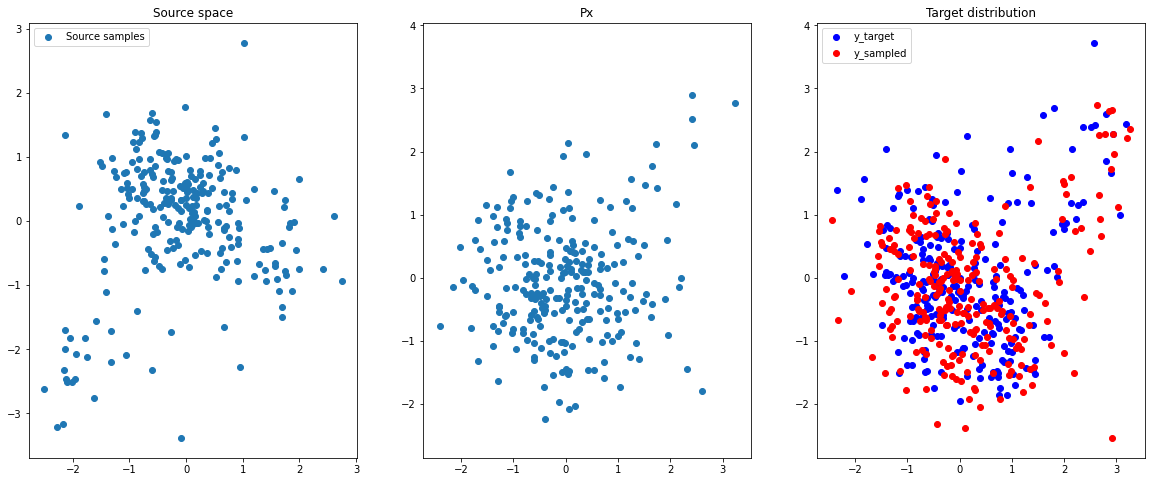

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

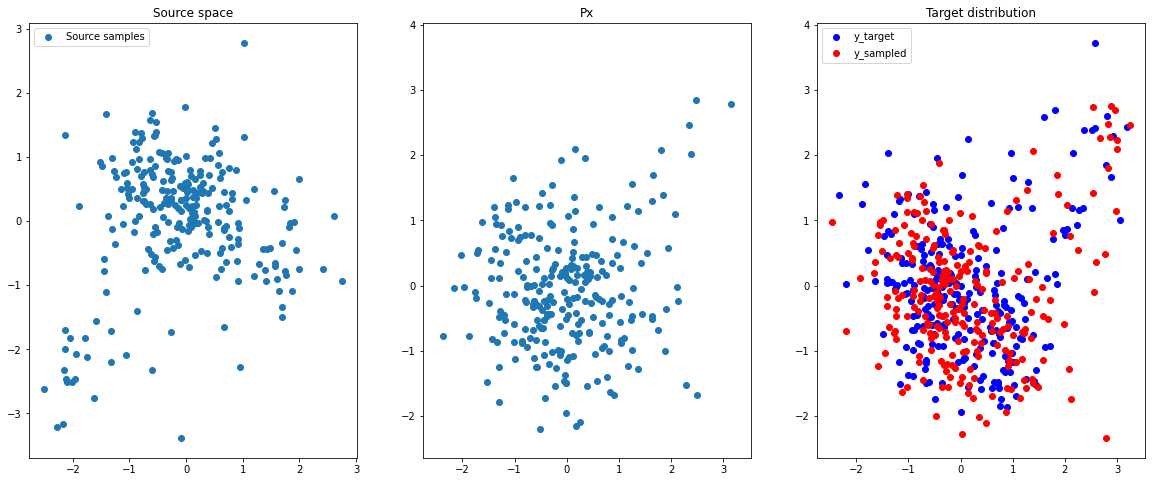

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

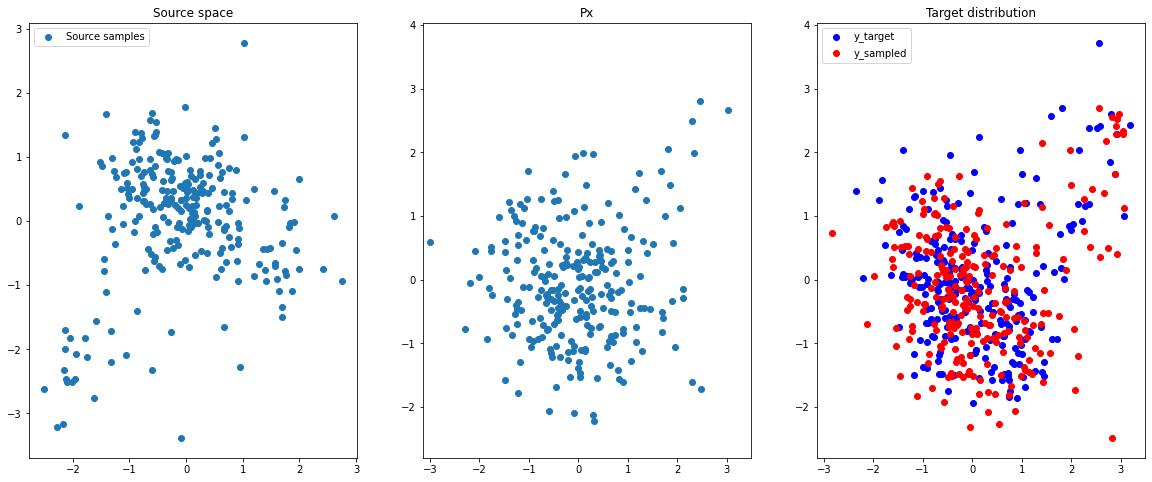

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

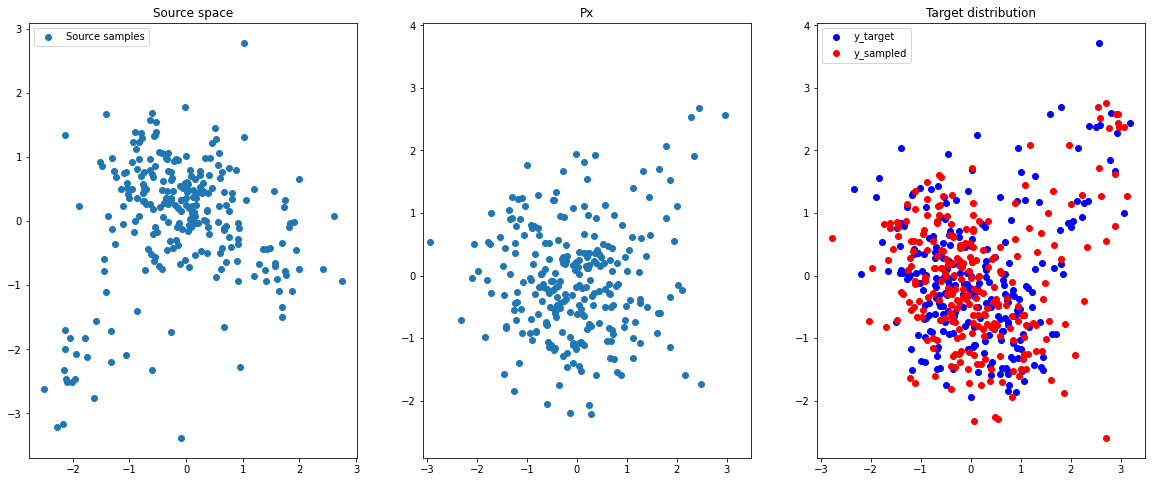

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

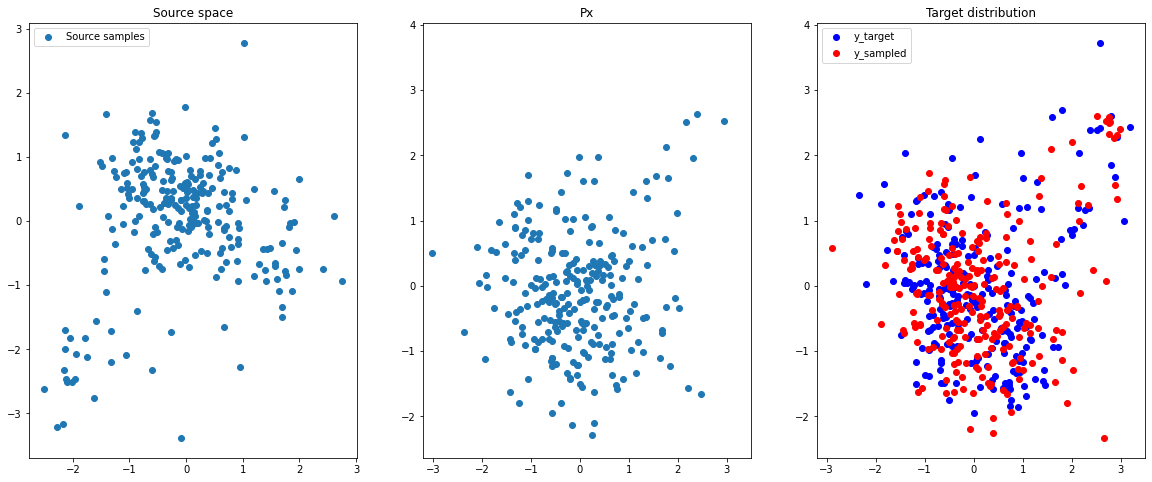

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

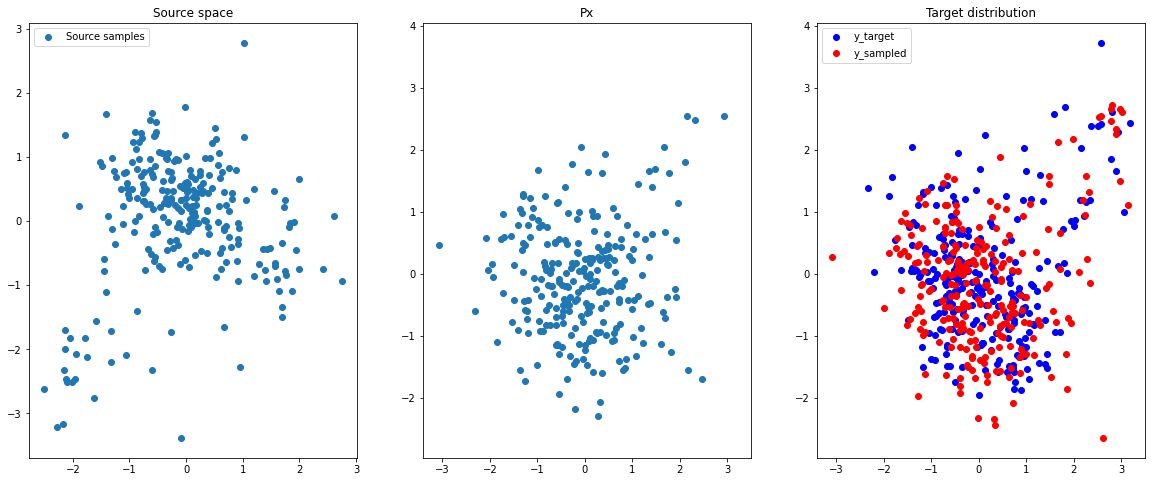

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

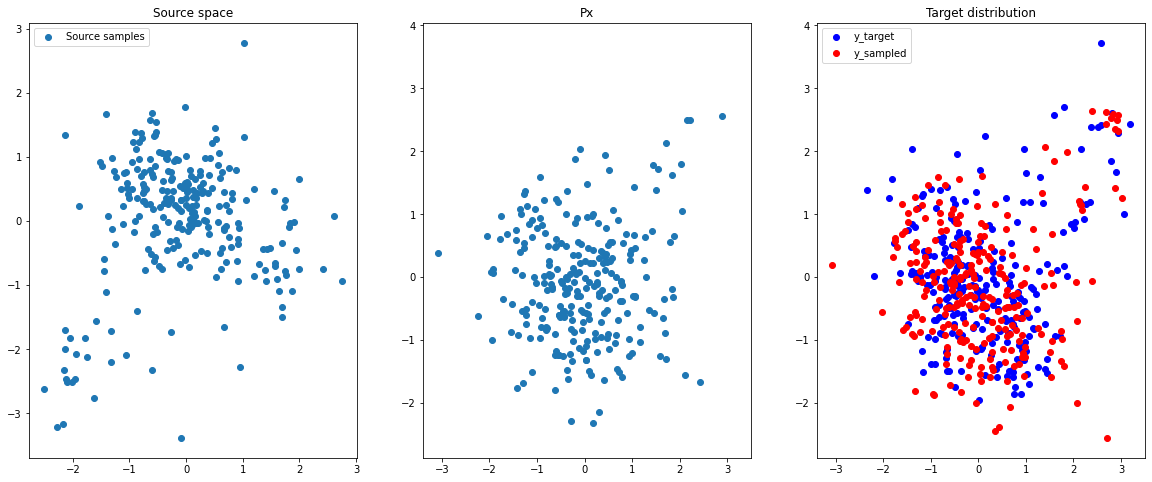

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

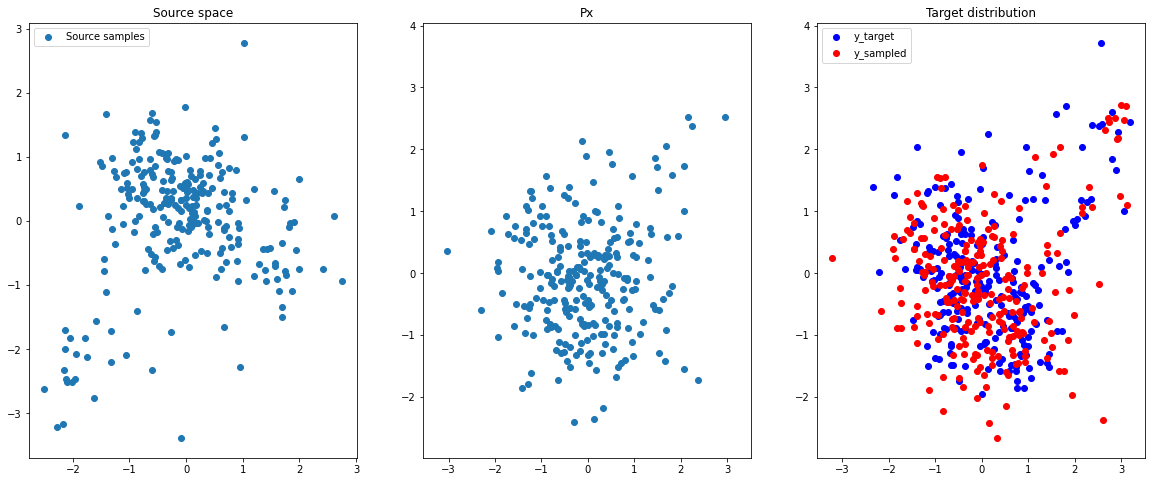

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

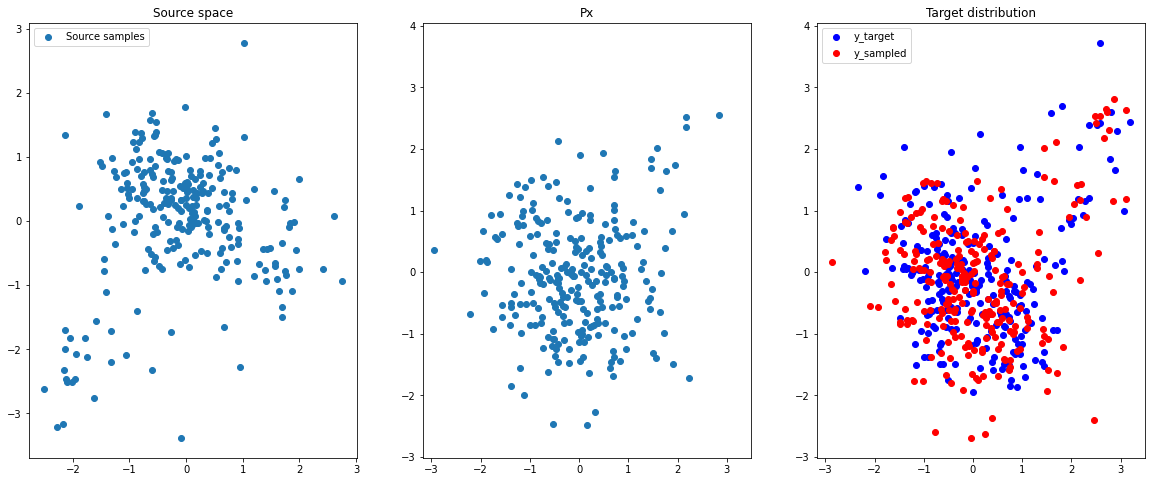

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

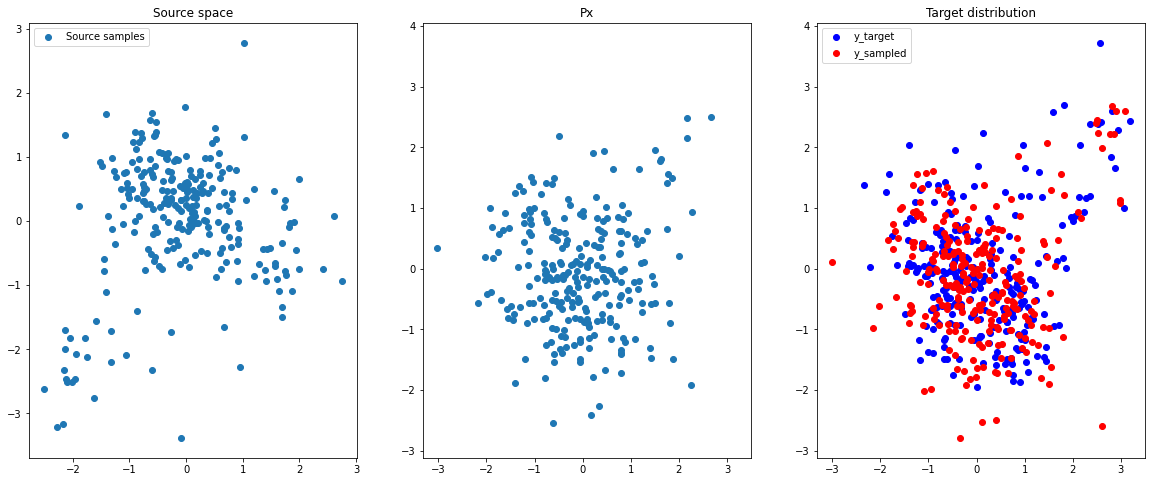

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

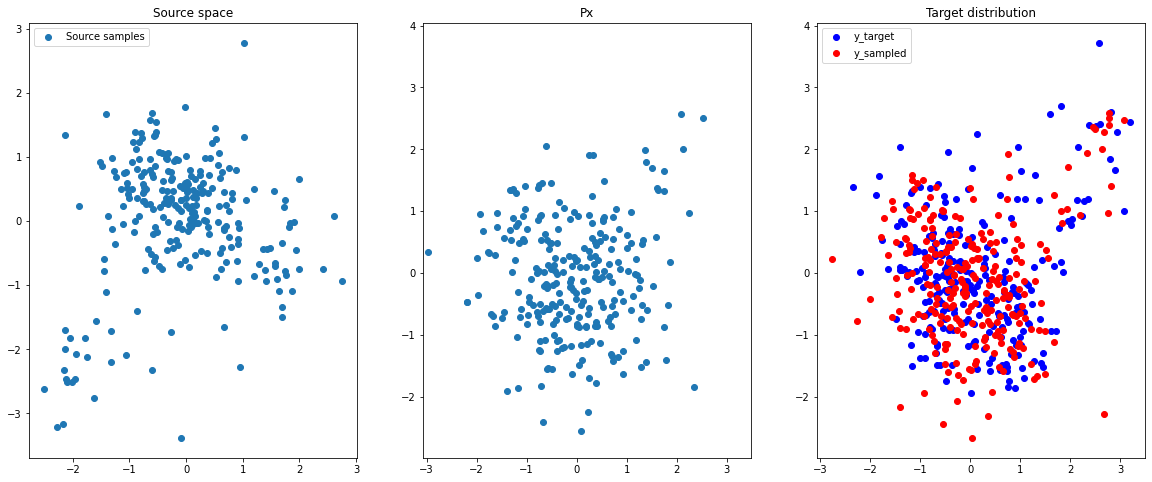

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

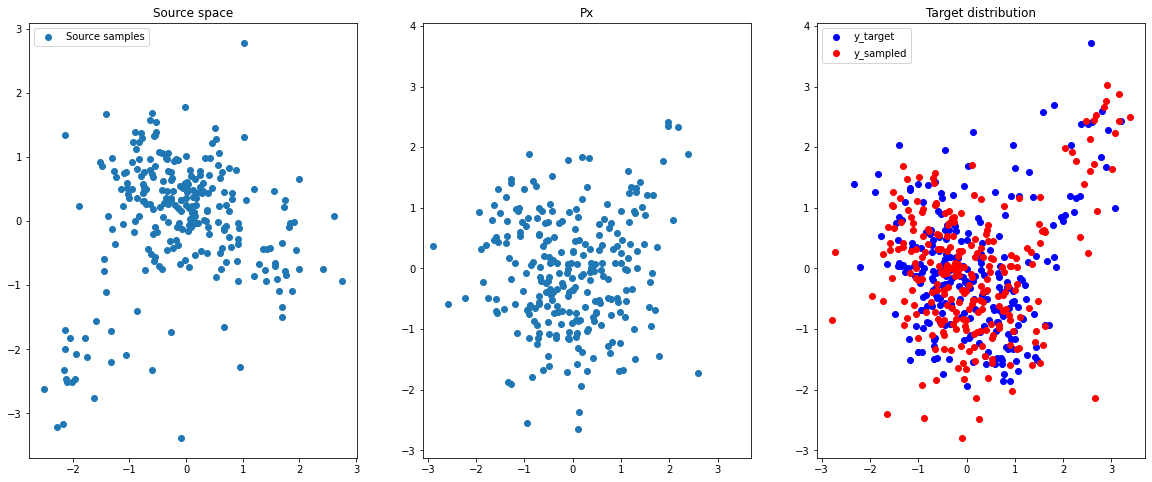

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

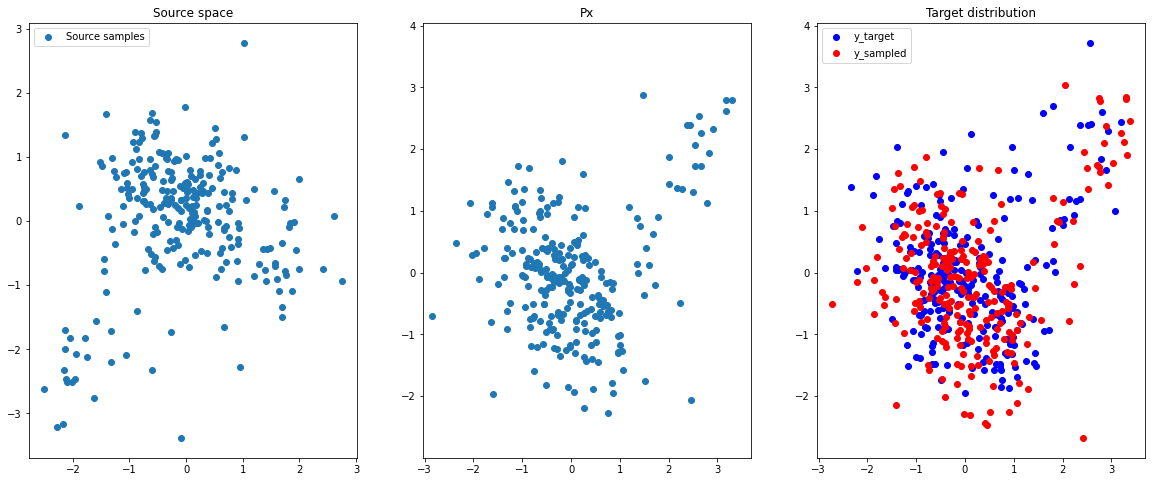

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

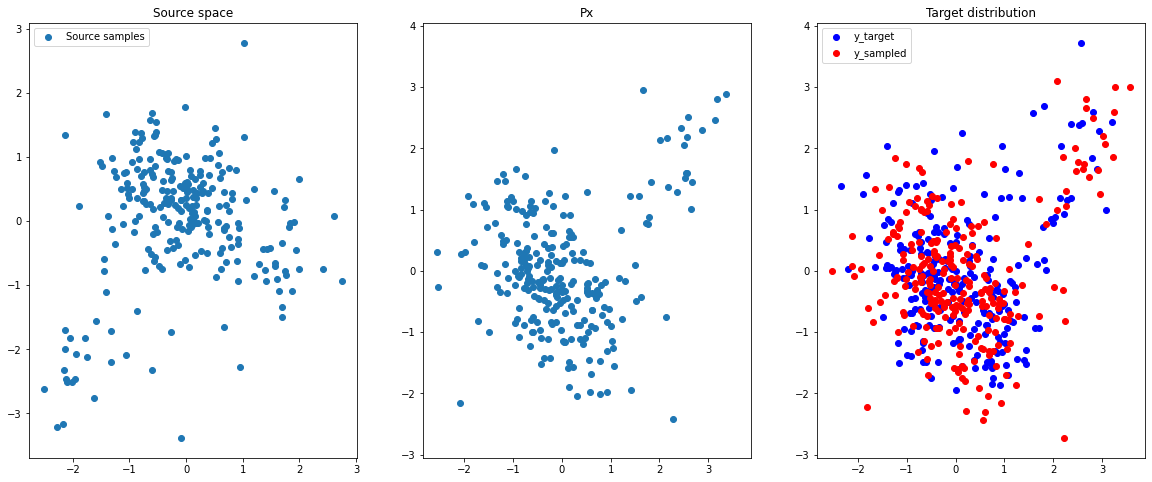

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

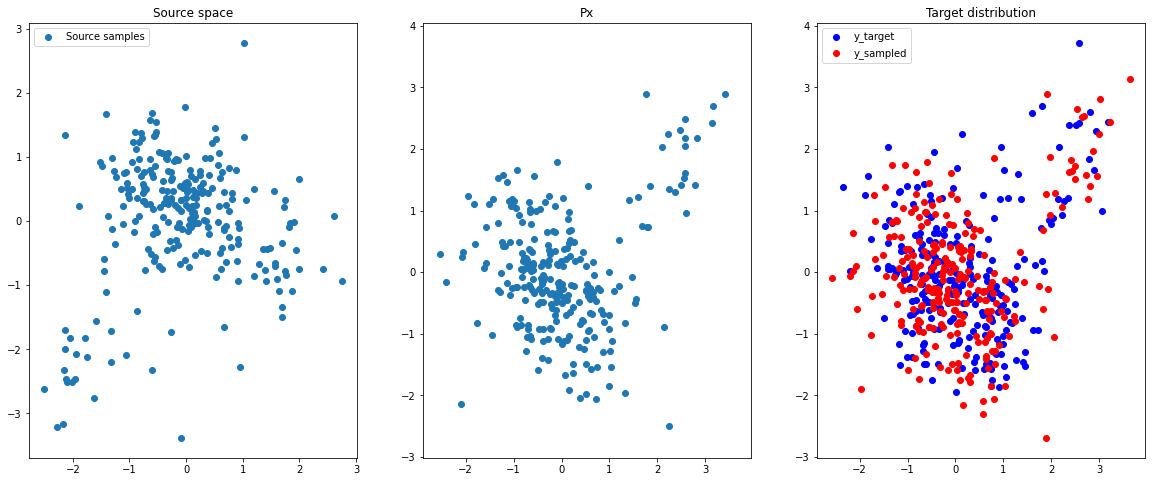

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

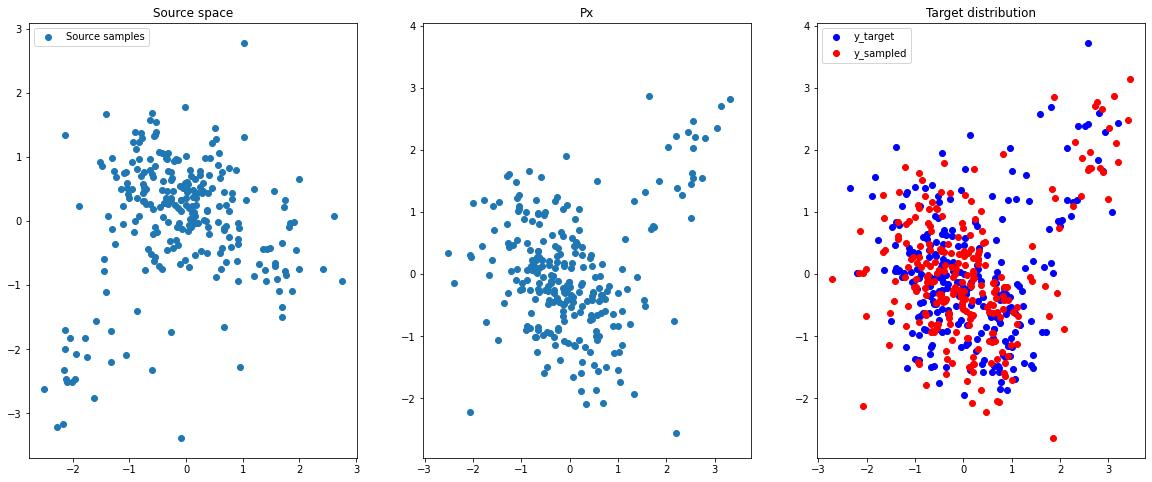

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

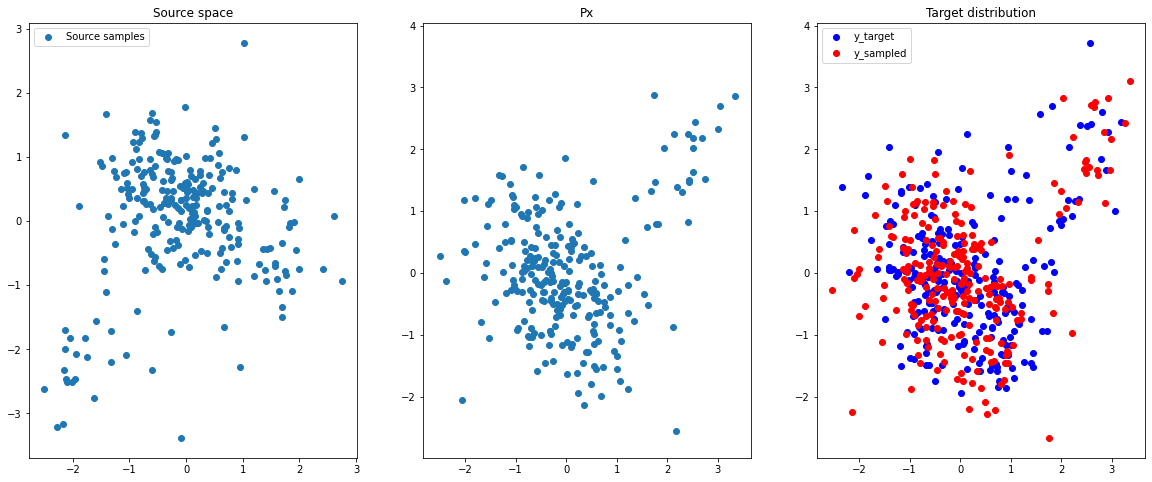

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

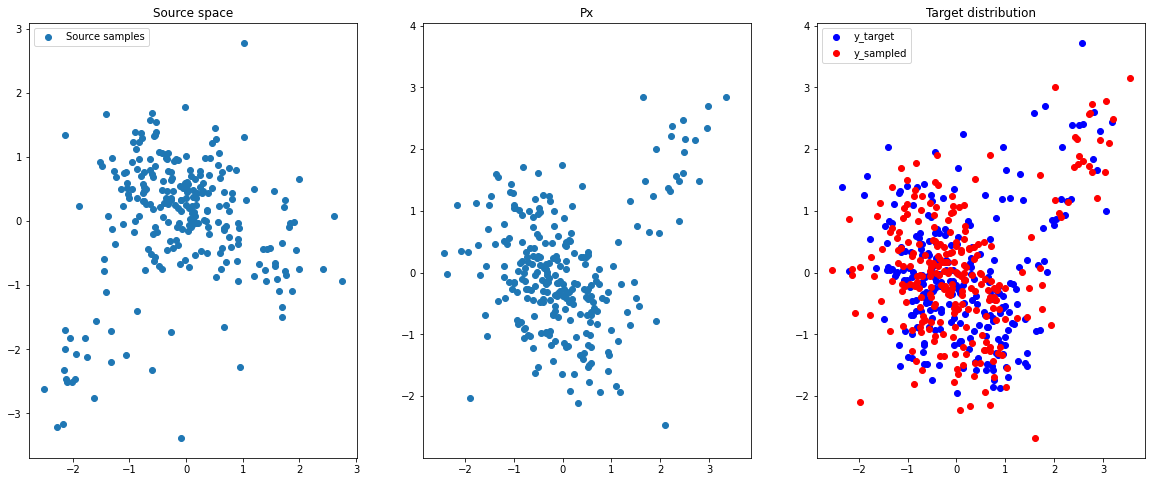

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

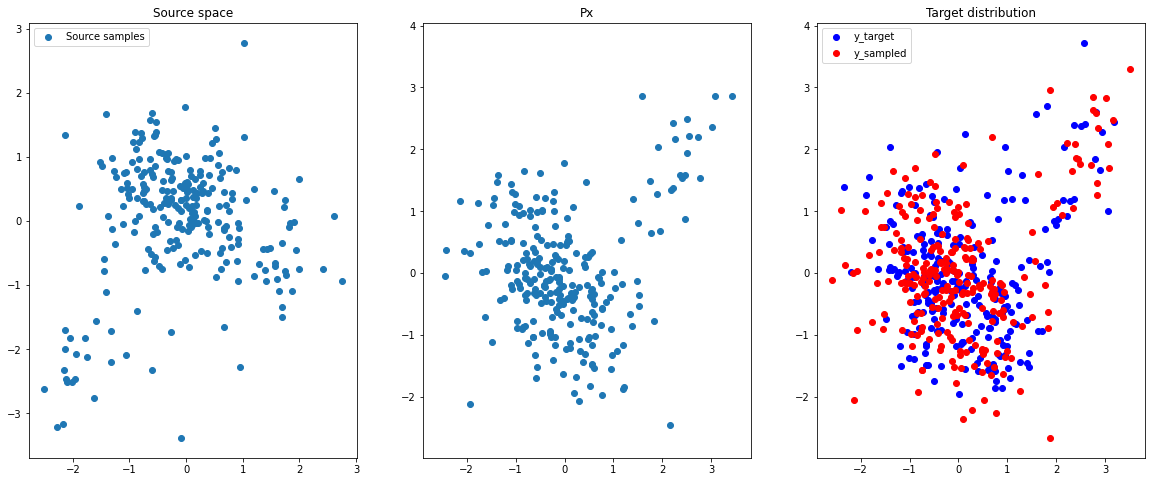

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

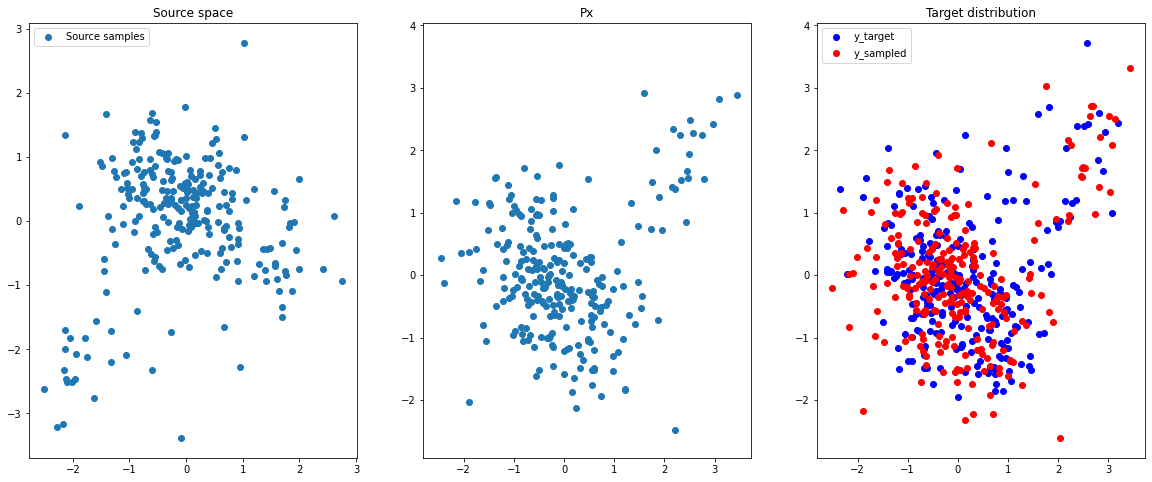

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

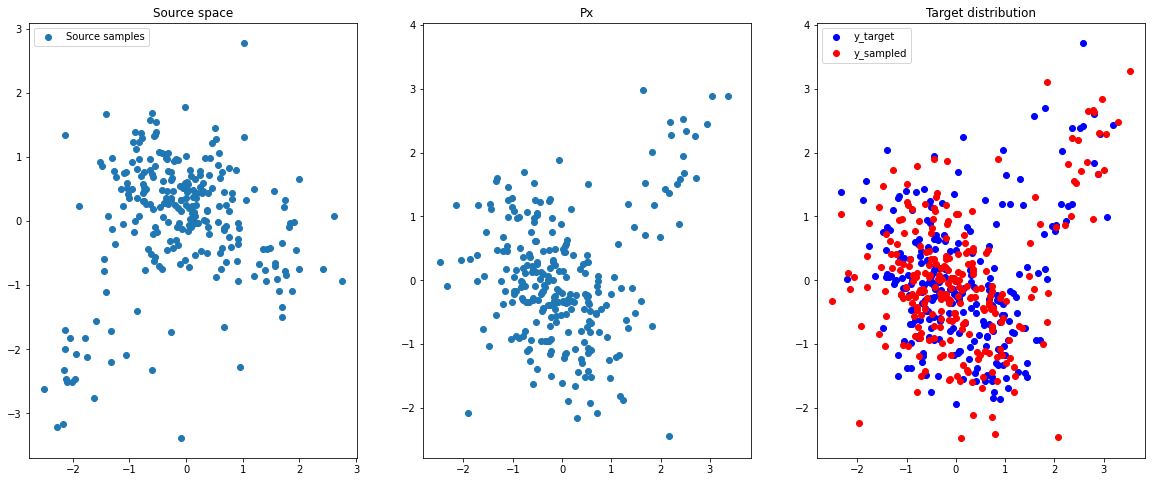

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

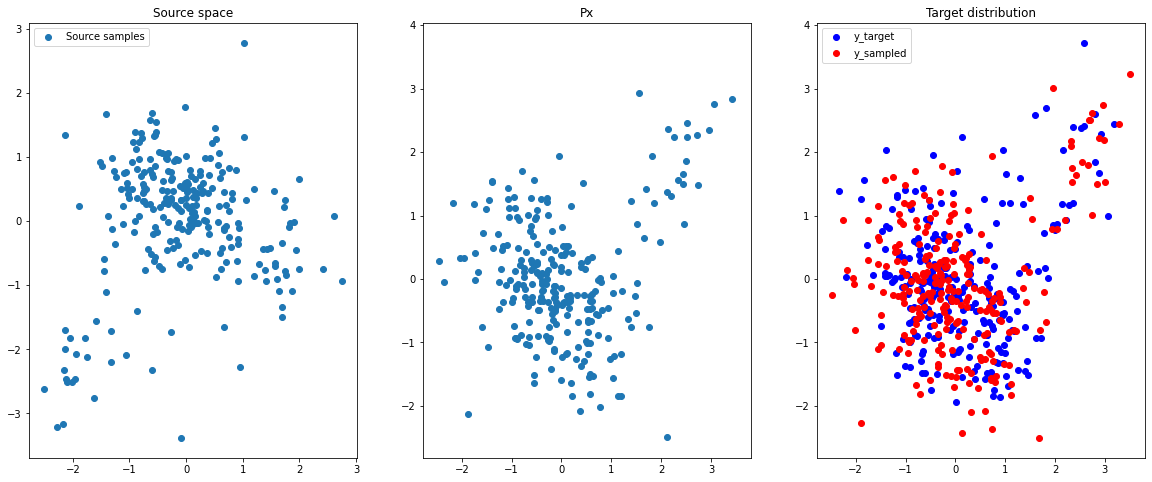

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

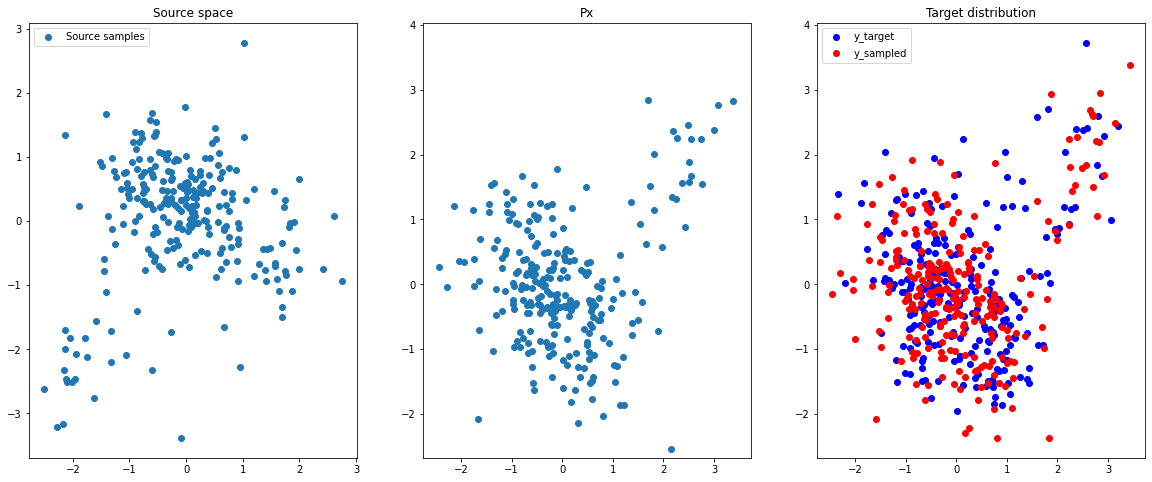

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

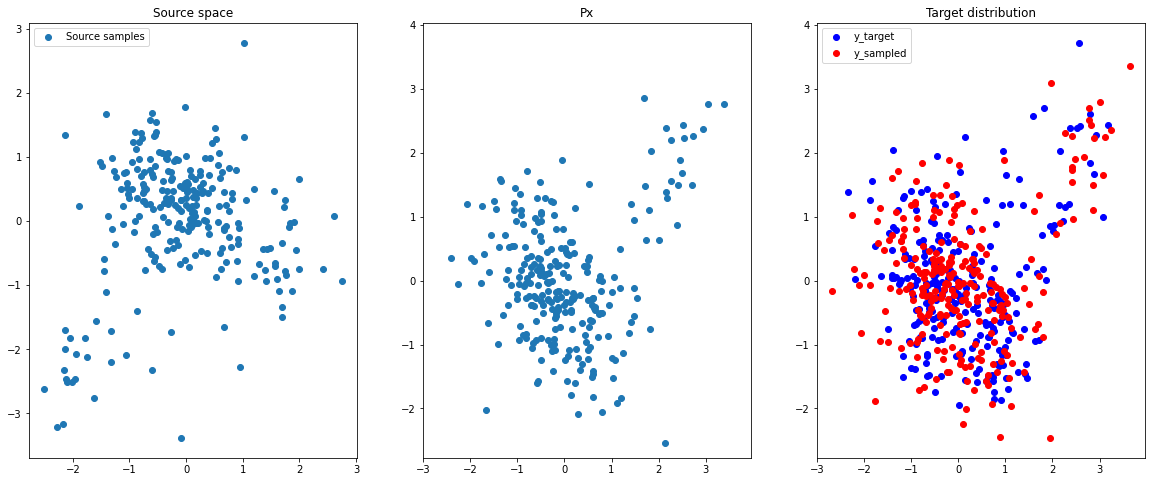

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

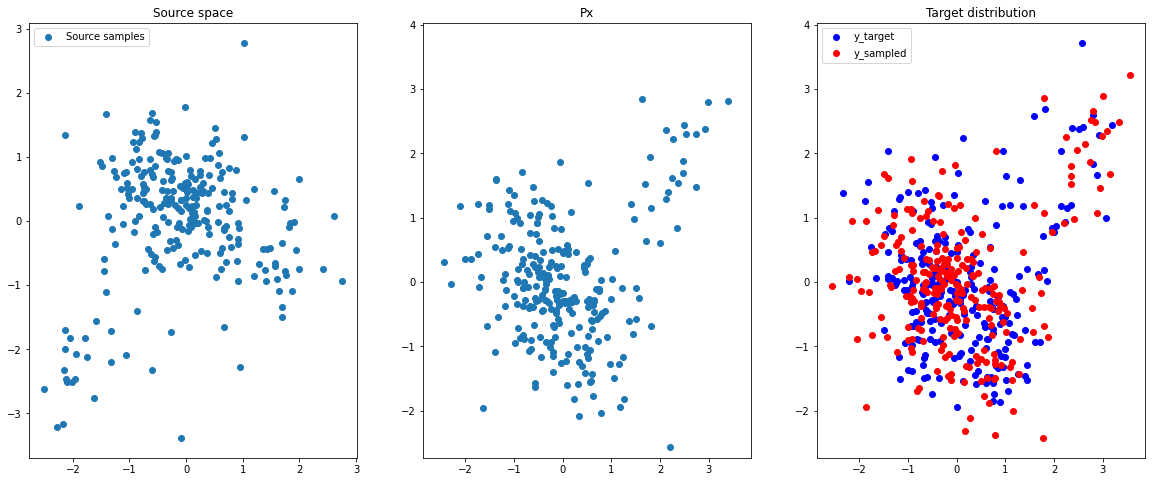

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

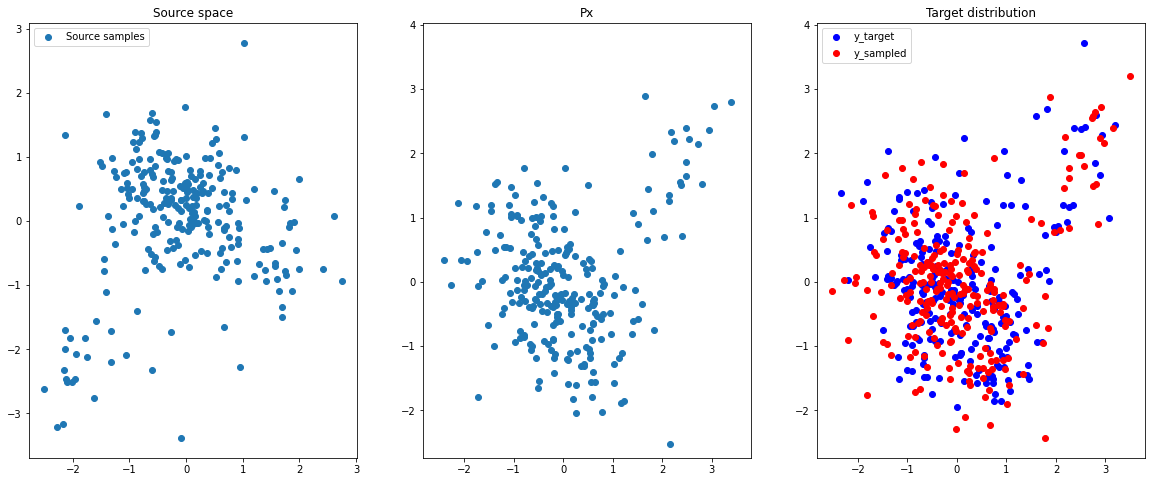

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

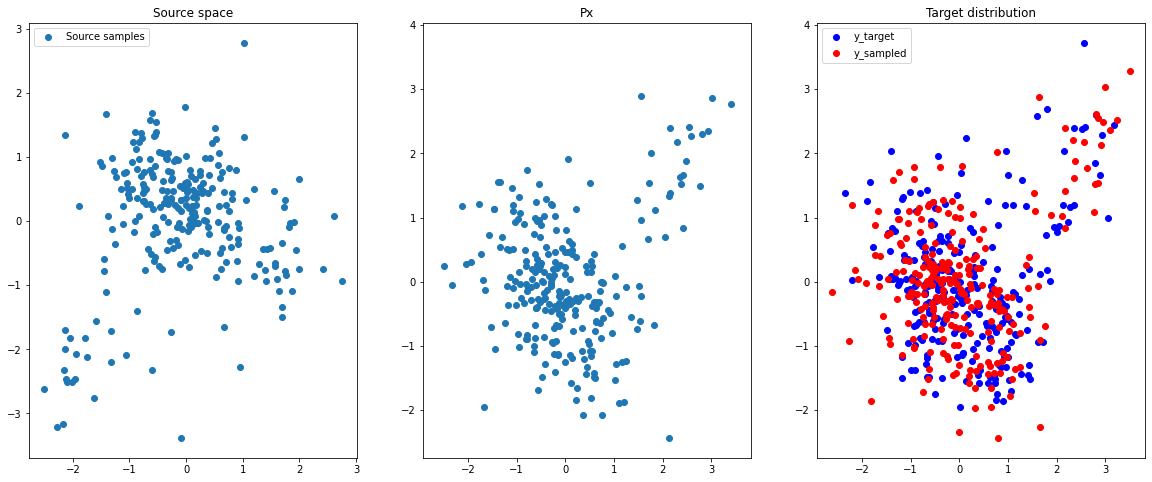

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

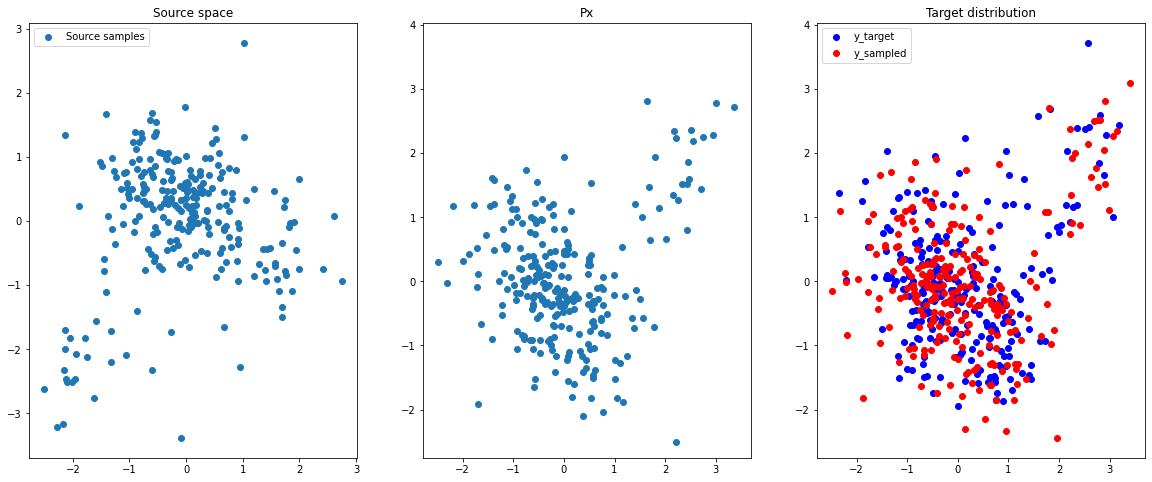

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

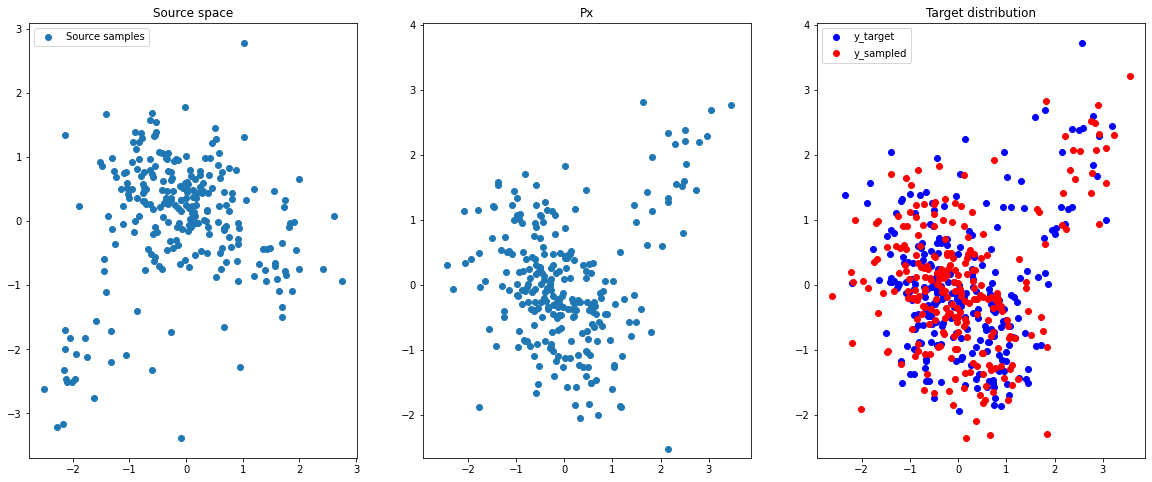

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

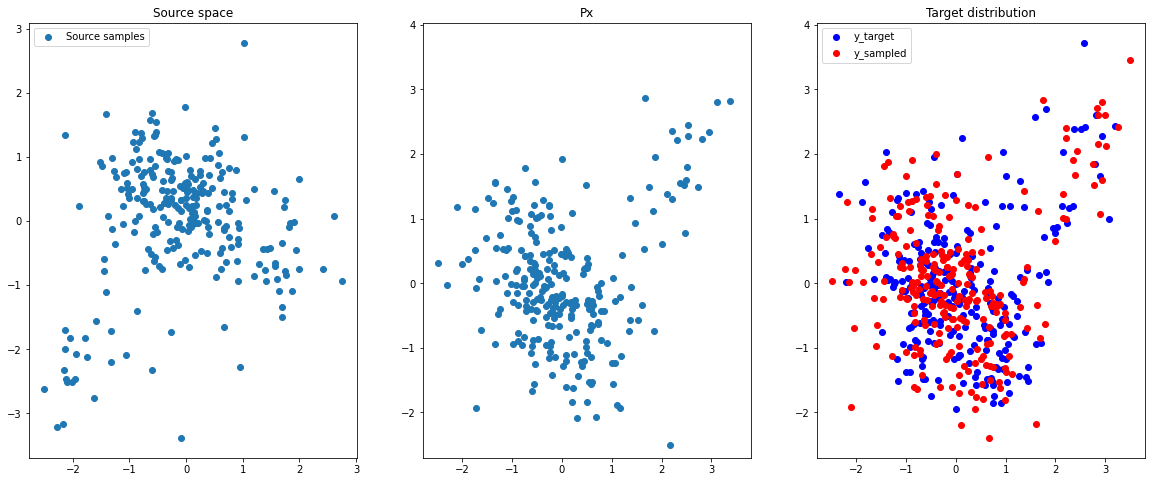

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

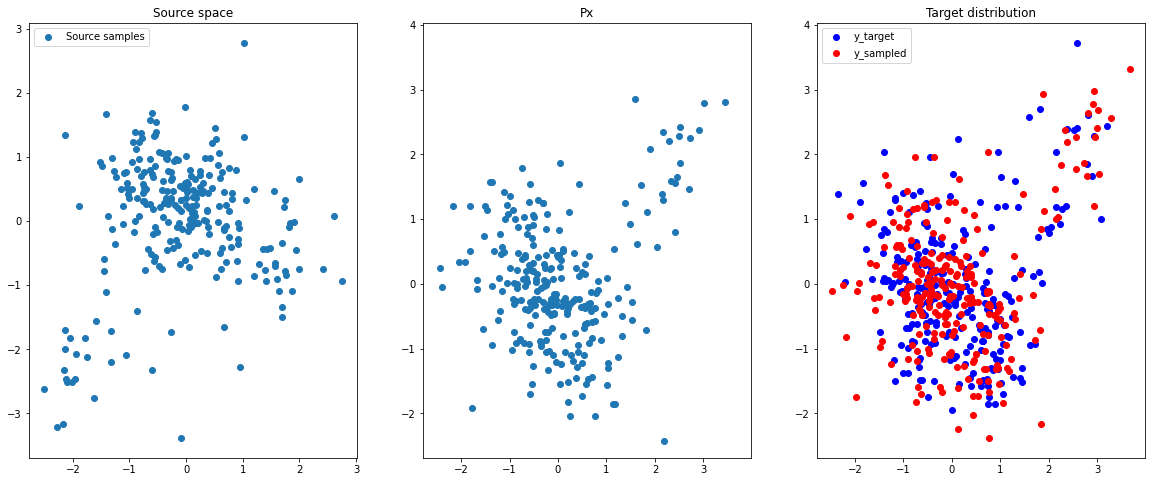

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

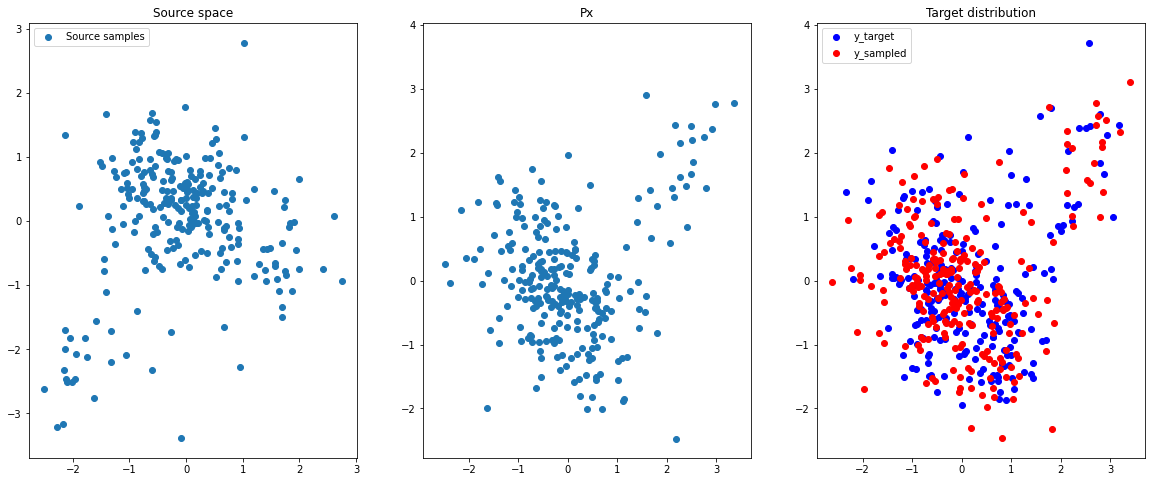

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

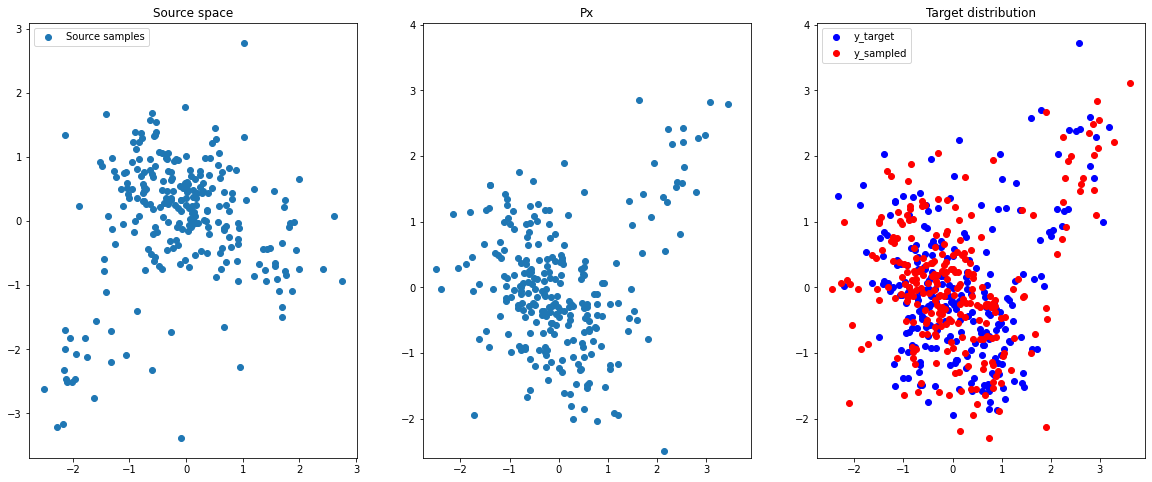

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

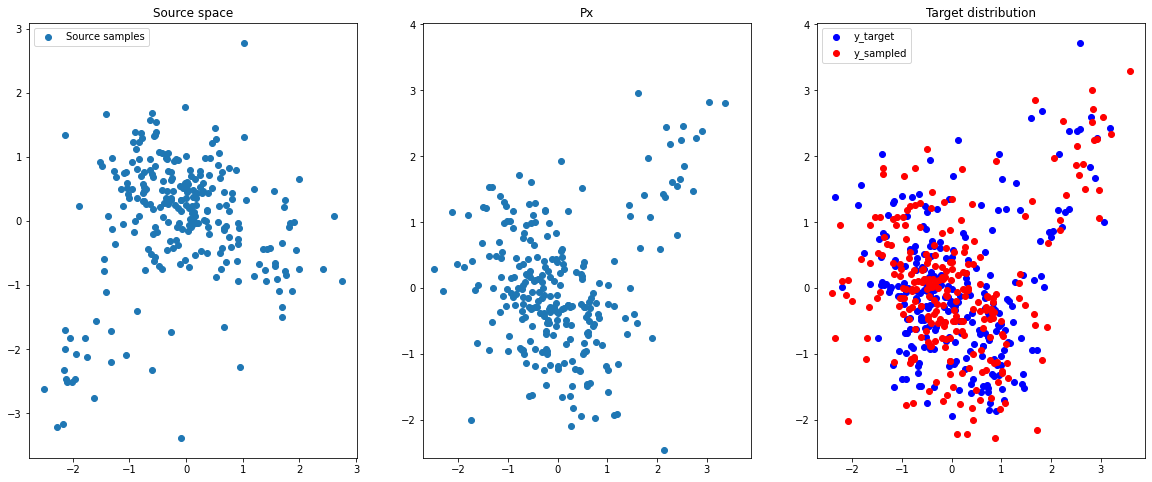

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

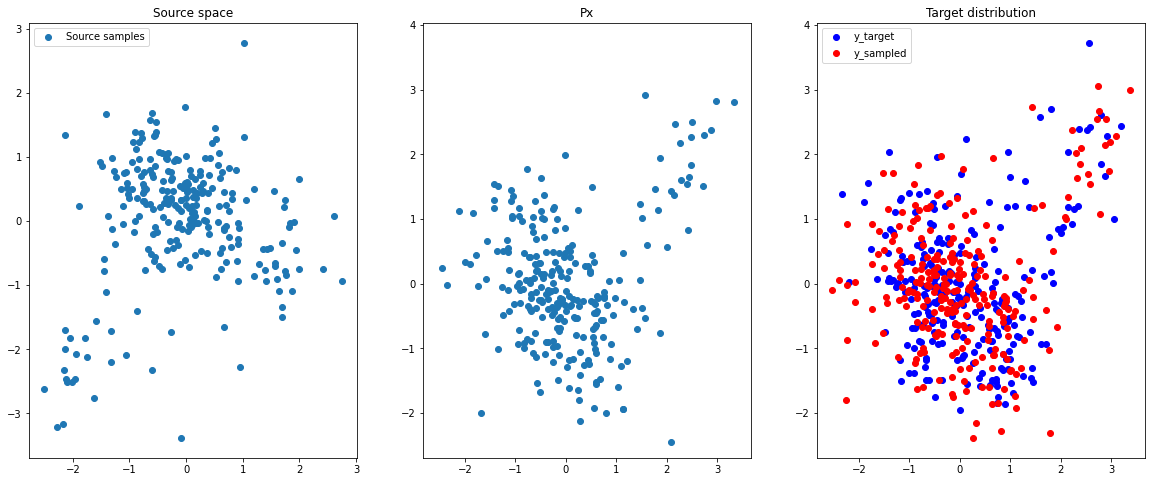

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

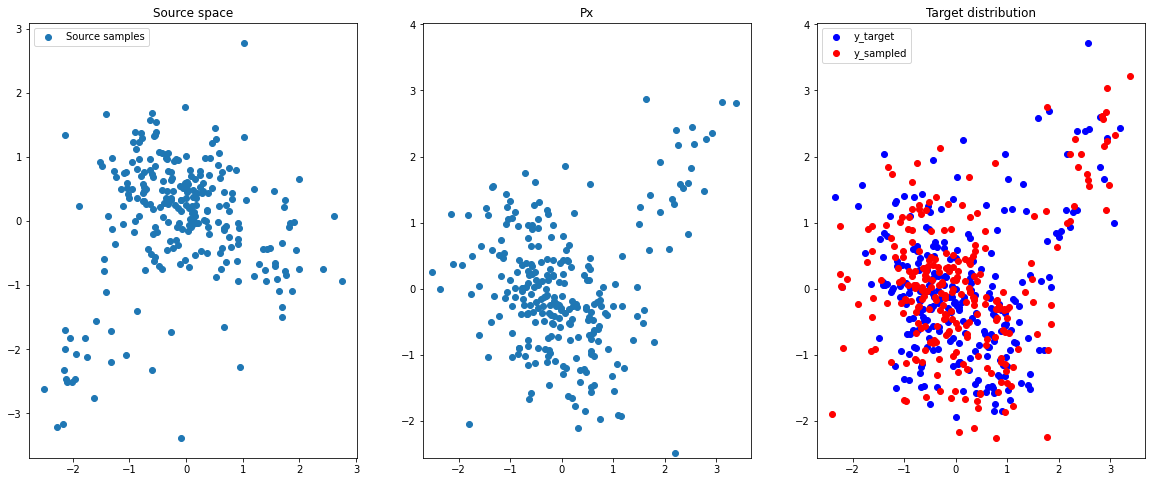

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

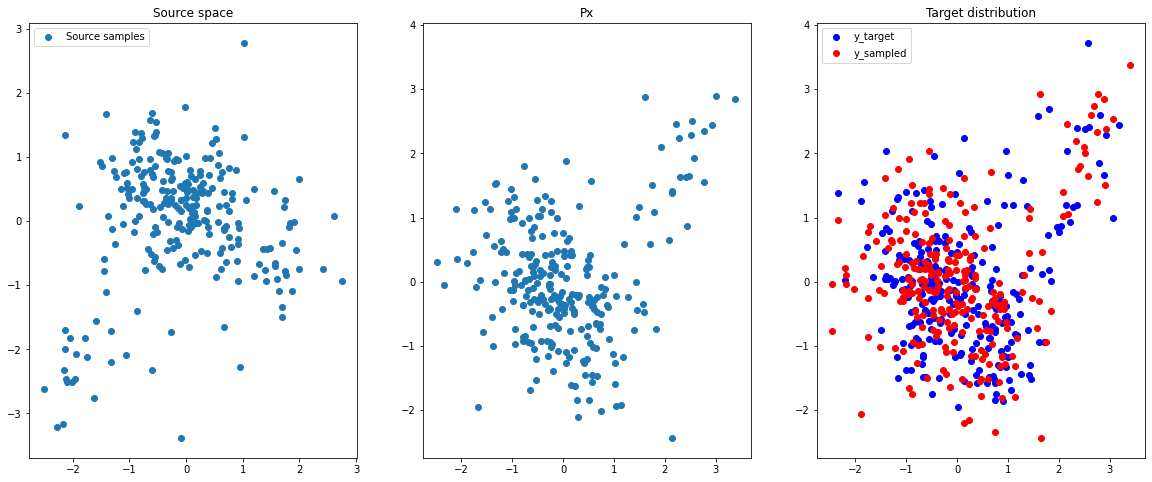

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

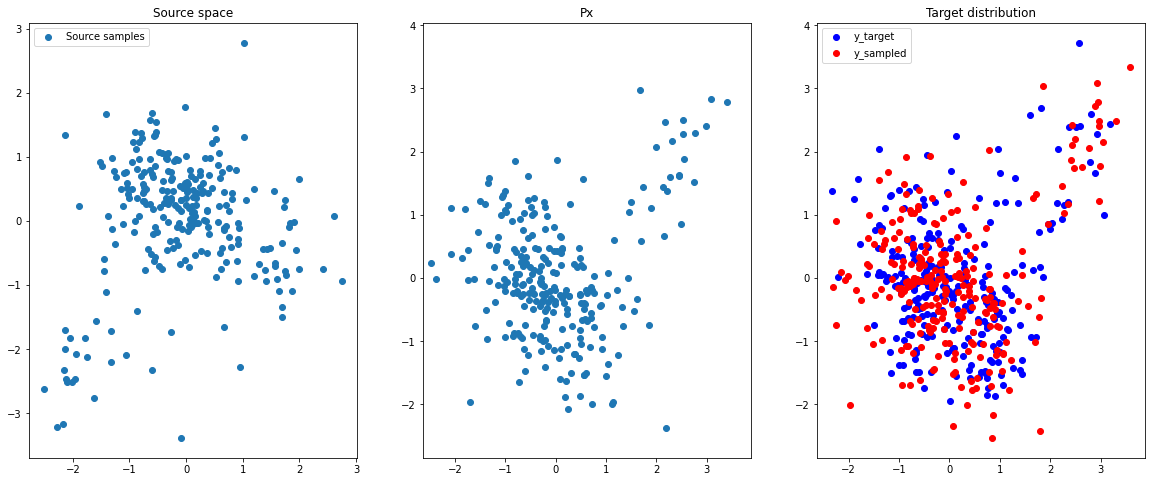

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

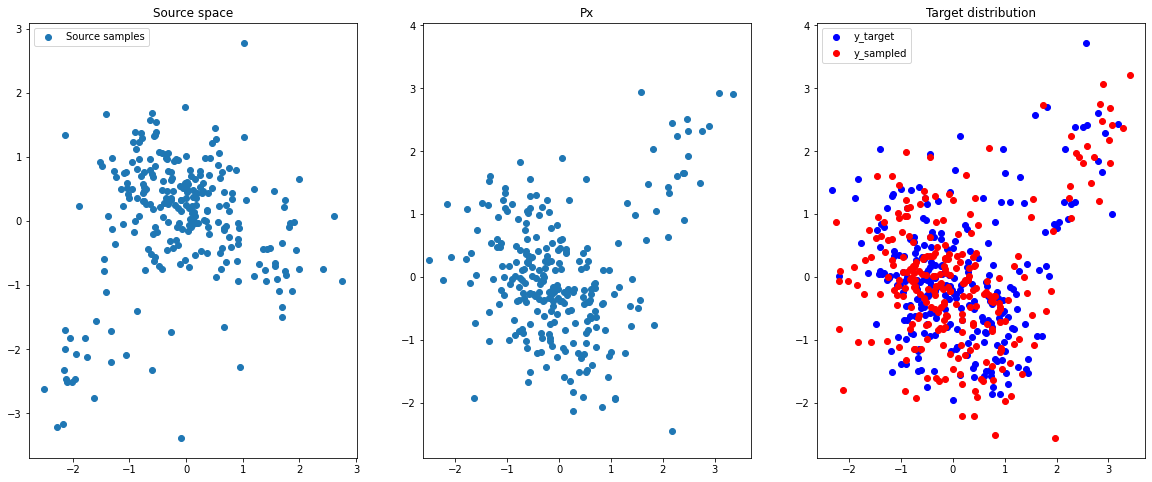

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

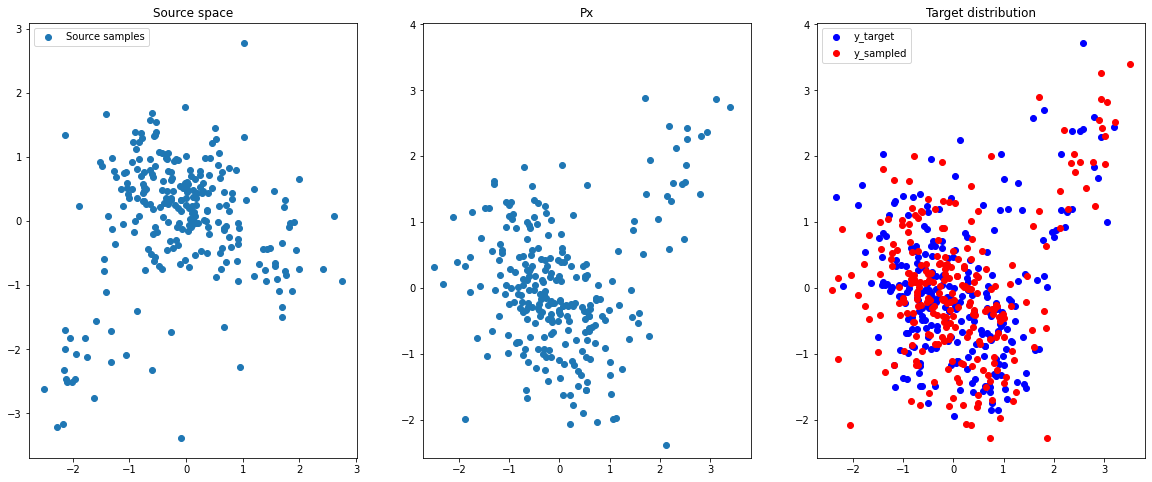

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

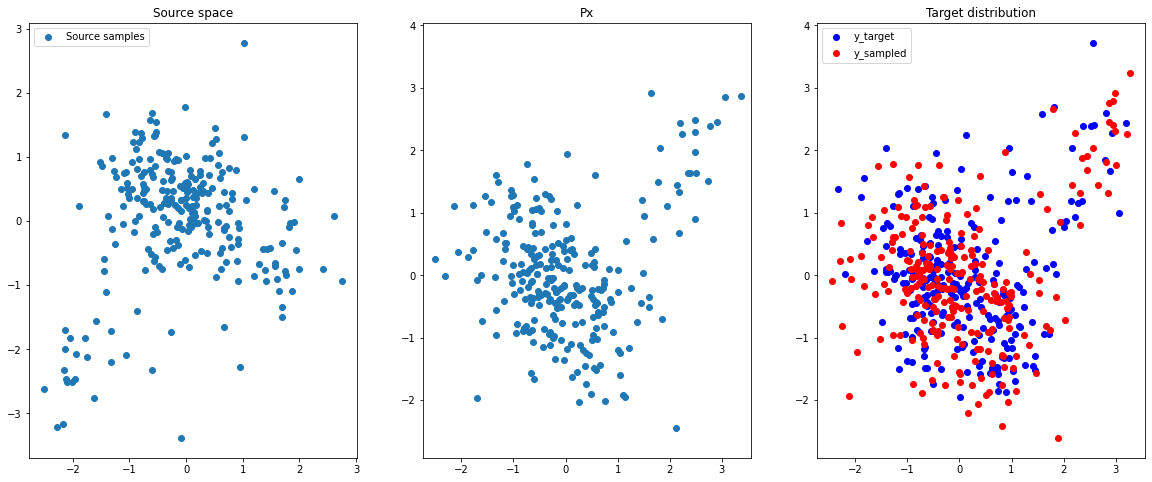

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

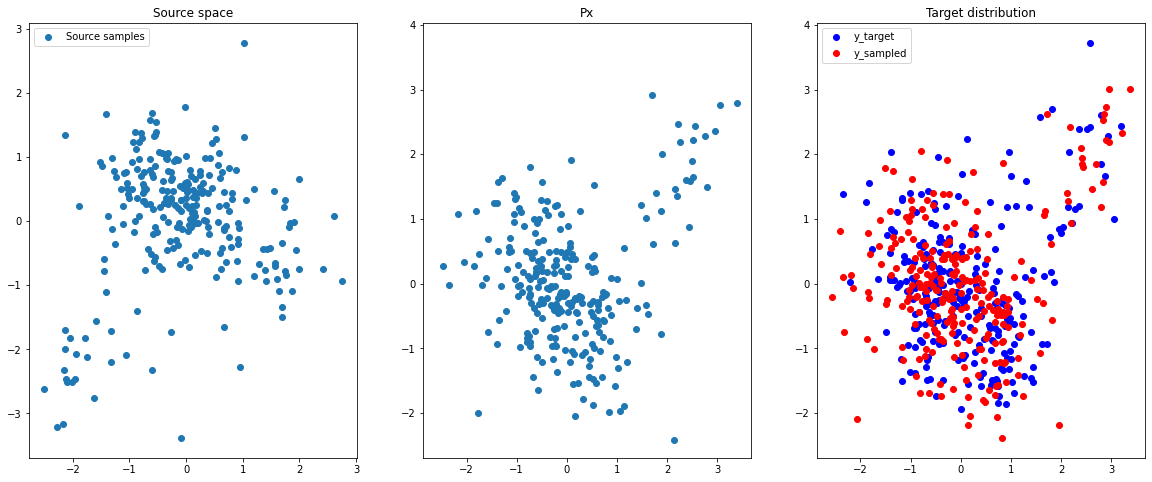

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

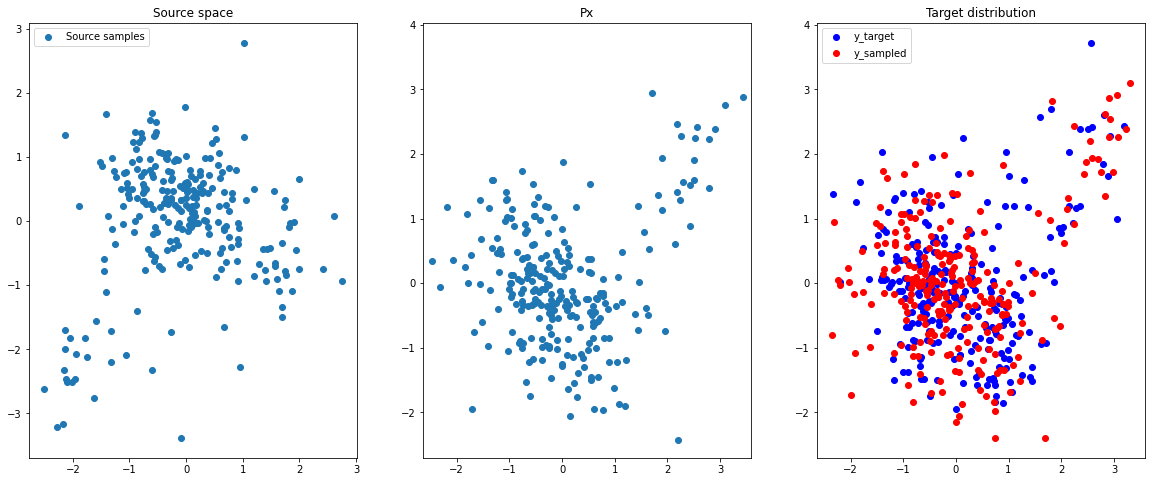

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

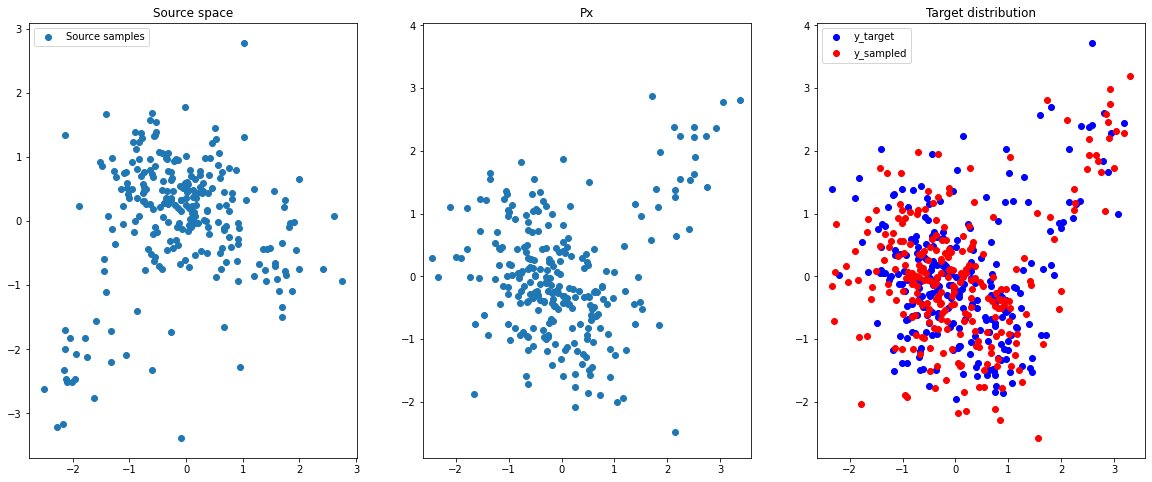

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

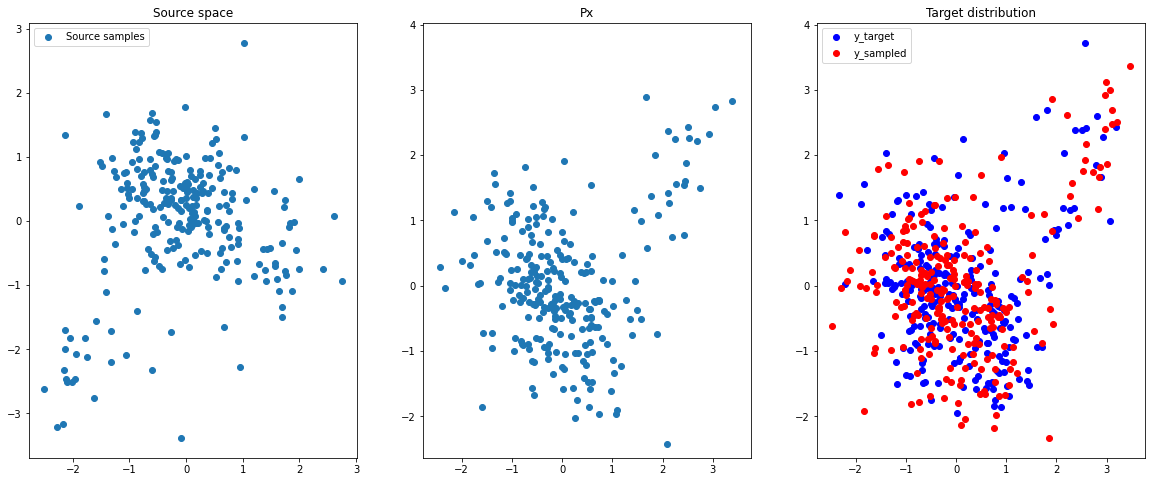

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

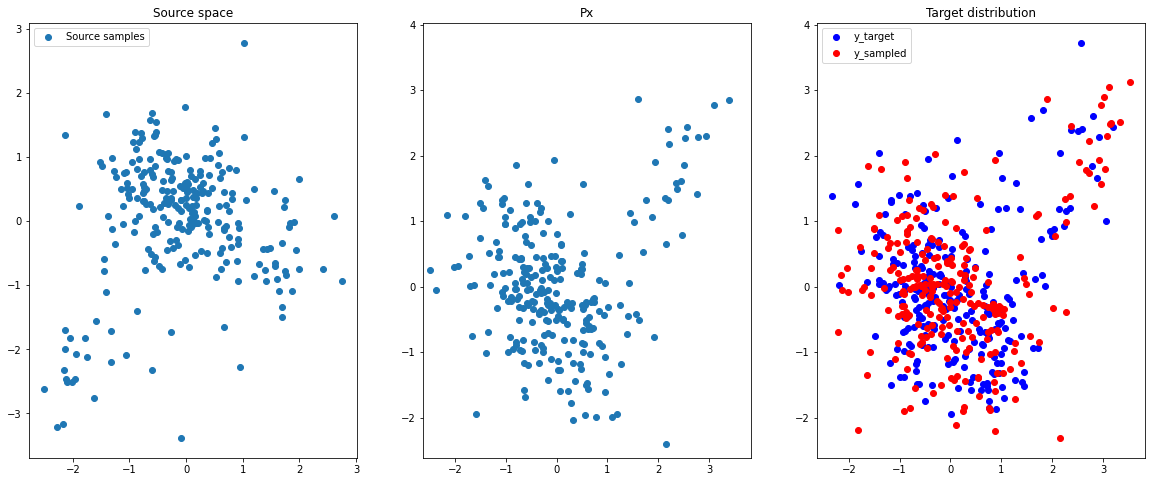

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

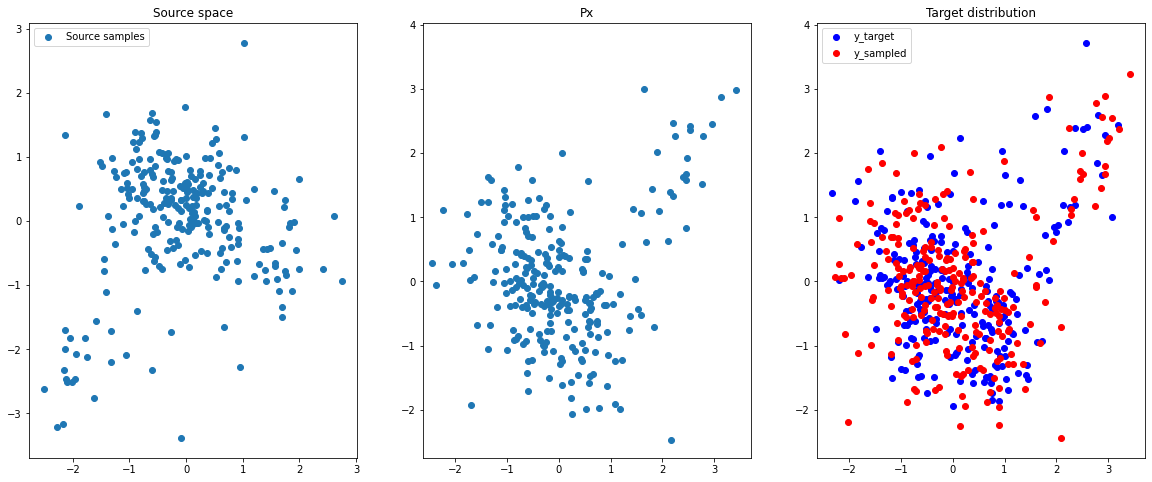

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

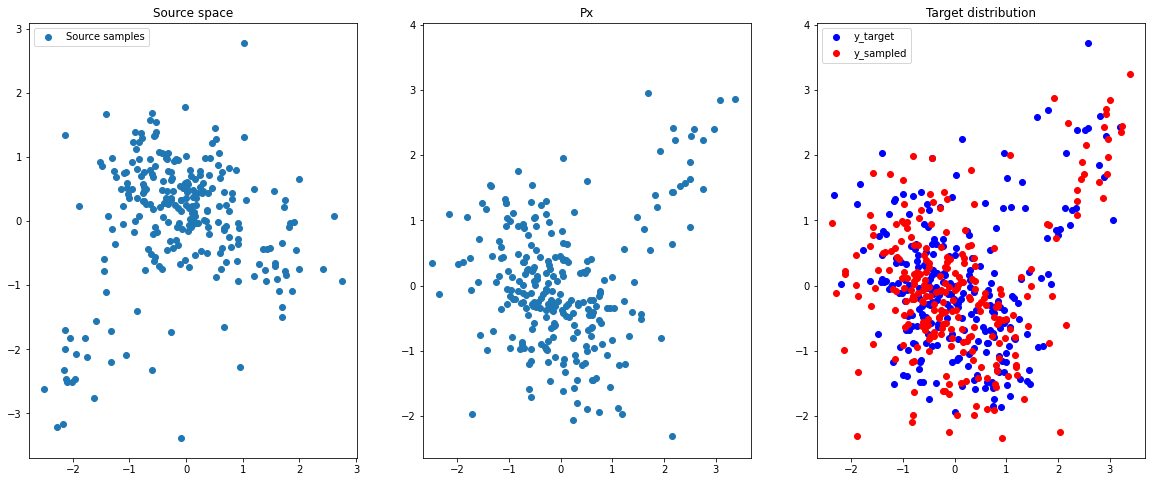

Train:   0%|          | 0/704 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

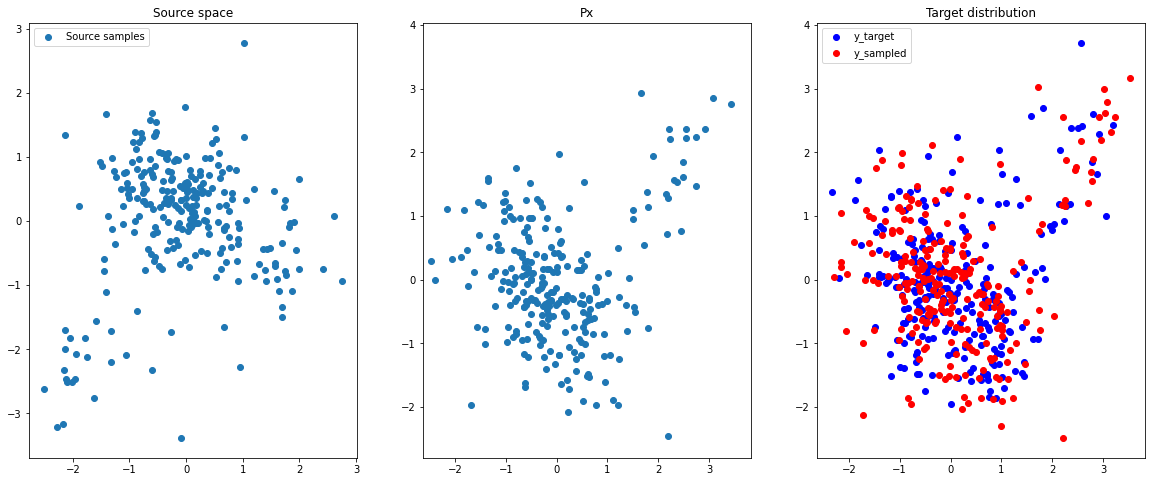

Train:   0%|          | 0/704 [00:00<?, ?it/s]

In [ ]:

n_repeats = 20
wandb_report = True
project_name = f'CONT_{DATASET_NAME}_{SOURCE_DIM}->{TARGET_DIM}_{METHOD_NAME}_seed_{SEED}'

metric_names_train = ['Top@1', 'Top@5', 'Top@10', 'cossim_gt', 'inner_gw', 'foscttm']
source_vectors, target_vectors, random_indices_train, random_indices_test = get_indices(dataset_path, config)

alpha_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
metrics_out = {str(np.round(alpha, 1)):[] for alpha in alpha_values}

for ALPHA in alpha_values:
    
    config['dataset']['ALPHA'] = ALPHA 
    
    print('================================')
    print(f'Experiment for ALPHA={ALPHA}')
    print('================================')
    source_vectors, target_vectors, train_sampler, test_sampler = get_samplers(source_vectors, target_vectors, random_indices_train, random_indices_test, config)

    pca_models = get_pca_models(source_vectors, target_vectors)
    
    for ix in range(n_repeats):

        if wandb_report:
            exp_name = f'ALPHA_{np.round(ALPHA, 1)}_repeat_{ix}'
            wandb.init(name=exp_name, config=config, project=project_name)
        
        trained_class, metrics_dict = train_continuous(train_sampler, test_sampler, 
                                                       metric_names_train, target_vectors,
                                                       config, None,
                                                       pca_models=pca_models,
                                                       wandb_report=wandb_report,
                                                       axis_lims=None, report_every=1)
        
    metrics_out[str(np.round(ALPHA, 1))].append(metrics_dict)

with open(f'results_continuous/{project_name}.pkl', 'wb') as f:
    pickle.dump(metrics_out, f)

In [10]:
print(metrics_out)

{'0.1': [], '0.2': [], '0.5': [], '0.7': [], '1.0': []}
